## 1. Set up

### 1 - Drive

1 - Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


2 - Move to the data folder

In [2]:
cd "gdrive/MyDrive/Projects/1 - Numericals/Predict Future Sales/2 - Production/data"

/content/gdrive/MyDrive/Projects/1 - Numericals/Predict Future Sales/2 - Production/data


### 2. Libraries

In [3]:
# Load data
import pandas as pd
import numpy as np
import io
import os
import glob

# Meta
import time

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.lines import Line2D

# Analysis
from scipy.stats import zscore

## 3. Data

1 - List file names

In [4]:
ls

cleaned_1.csv                                      sales_train.csv
competitive-data-science-predict-future-sales.zip  sample_submission.csv
item_categories.csv                                shops.csv
items.csv                                          test.csv
kaggle.json


In [5]:
# Load sales_train
df = pd.read_csv('cleaned_1.csv')

## 4. Classes

1 - Define the class

A - Data Assessment of one class

In [6]:
# Class that helps the assessment of each table individually
class DataAssessment:

  def __init__(self, df):
    self.df = df


  # Get the basic file information
  def files_basic_info(self):
    '''
    Function - Get the very basic details about the data files
    Input - None
    Action - Find the number of csv files, file size,
            number of rows and number of columns
    Dependencies - 
      import glob
      import os
    '''
    begin = time.time()
    
    # Get all the files in the folder
    files = os.listdir()
    file_list = glob.glob('*.csv')

    # Find the number of files in the folder
    print('The number of files in the directory is:',len([name for name in os.listdir('.') if os.path.isfile(name)]))
    print('\n')
    print('The file names are:')
    print(files)
    print('\n')

    # Get the details of the csv files
    print('The csv files details are:')
    print('\n')
    for i in file_list:
      print('File:',i)
      file_size = os.path.getsize(i)
      converted_size = self.formatFileSize(file_size, 'B', 'MB', precision=0)
      df = pd.read_csv(i,error_bad_lines=False)
      df_shape = df.shape
      n_rows = df_shape[0]
      n_columns = df_shape[1]
      file_size = self.formatFileSize(file_size, 'B', 'MB', precision=2)
      head = df.head()
      print('File size:',file_size,'MB')
      print('Number of data points:',n_rows)
      print('Number of features:',n_columns)
      print('\n')
    end = time.time()
    self.find_time_taken(begin, end)

  
  # Code attribution : https://www.codegrepper.com/code-examples/python/convert+bytes+to+mb+python
  def convertFloatToDecimal(self, f=0.0, precision=2):
      '''
      Function: Convert a float to string of decimal.
      precision: by default 2.
      If no arg provided, return "0.00".
      '''
      return ("%." + str(precision) + "f") % f


  # Code attribution : https://www.codegrepper.com/code-examples/python/convert+bytes+to+mb+python
  def formatFileSize(self, size, sizeIn, sizeOut, precision=0):
    '''
    Function: Convert file size to a string representing its value in B, KB, MB and GB.
    The convention is based on sizeIn as original unit and sizeOut
    as final unit. 
    '''
    assert sizeIn.upper() in {"B", "KB", "MB", "GB"}, "sizeIn type error"
    assert sizeOut.upper() in {"B", "KB", "MB", "GB"}, "sizeOut type error"
    if sizeIn == "B":
        if sizeOut == "KB":
            return self.convertFloatToDecimal((size/1024.0), precision)
        elif sizeOut == "MB":
            return self.convertFloatToDecimal((size/1024.0**2), precision)
        elif sizeOut == "GB":
            return self.convertFloatToDecimal((size/1024.0**3), precision)
    elif sizeIn == "KB":
        if sizeOut == "B":
            return self.convertFloatToDecimal((size*1024.0), precision)
        elif sizeOut == "MB":
            return self.convertFloatToDecimal((size/1024.0), precision)
        elif sizeOut == "GB":
            return self.convertFloatToDecimal((size/1024.0**2), precision)
    elif sizeIn == "MB":
        if sizeOut == "B":
            return self.convertFloatToDecimal((size*1024.0**2), precision)
        elif sizeOut == "KB":
            return self.convertFloatToDecimal((size*1024.0), precision)
        elif sizeOut == "GB":
            return self.convertFloatToDecimal((size/1024.0), precision)
    elif sizeIn == "GB":
        if sizeOut == "B":
            return self.convertFloatToDecimal((size*1024.0**3), precision)
        elif sizeOut == "KB":
            return self.convertFloatToDecimal((size*1024.0**2), precision)
        elif sizeOut == "MB":
            return self.convertFloatToDecimal((size*1024.0), precision)


    # Show the first 10 rows of the dataframe
  def print_head(self, df):
    '''
    Function: Print the first 10 rows of the dataframe 
    Input: A dataframe
    Output: The first 10 rows of the dataframe
    '''
    return df.head(n=10)
  
  # Show a single datapoint vertically
  def print_vertically(self, df):
    '''
    Function: Print the first data point vertically
    Input: A dataframe
    Output: The first data point vertically
    '''
    return df.iloc[0]

  # Find duplicates
  def find_duplicates(self, df):
    '''
    Function - Find and display duplicate columns and rows of the dataframe
    Input - Dataframe
    Output - Display duplicate columns and rows of the dataframe
    '''
    begin = time.time()

    # Find duplicate rows
    row_duplicates = df[df.duplicated()]
    
    # Find duplicate columns
    duplicate_columns = set()
    other_columns = set()
    
    for x in range(df.shape[1]):
      col = df.iloc[:, x]
      for y in range(x + 1, df.shape[1]):
        otherCol = df.iloc[:, y]
        
        if col.equals(otherCol):
          duplicate_columns.add(df.columns.values[y])
          other_columns.add(df.columns.values[x])
    
    dup_columns = (list(duplicate_columns))
    dup_other_columns = (list(other_columns))

    
    columns = 2
    rows = len(dup_columns)
    column_duplicates = []
    column_duplicates = [[0 for i in range(columns)] for j in range(rows)]
    
    for i in range(len(column_duplicates)):
      val_one = dup_columns[i]
      val_two = dup_other_columns[i]
      column_duplicates[0][i] = val_one
      column_duplicates[i][1] = val_two
    print('\nRow duplicates:')
    print(row_duplicates)
    print('\n')
    print('\nColumn duplicates:')
    print(column_duplicates)

    end = time.time()
    time_taken = end - begin


  # Check the data types of the dataframe
  def check_feature_types(self, df):
    '''
    Function: Get basic information on the dataframe 
    Input: Dataframe
    Output: Some basic information on the dataframe 
    '''
    begin = time.time()

    # Get the information from the dataframe

    # Get the shape of the dataframe
    data_shape = df.shape
    # Get the data types
    data_types = df.dtypes
    # Get the number of rows and columns
    n_rows = data_shape[0]
    n_columns = data_shape[1]
    # Find the missing values
    null_values = df.isnull().sum()
    # Find numeric columns and categorical columns
    numeric_columns = df.select_dtypes([np.number]).columns.tolist()
    columns = list(df)
    categorical_columns = []
    for i in columns:
      if i not in numeric_columns:
        categorical_columns.append(i)
      else:
        None
    
    print('\nCategorical columns:',len(categorical_columns))
    print(categorical_columns)
    print('\nNumeric columns:',len(numeric_columns))
    print(numeric_columns)
    print('\n')
    print('The column type information:')
    df.info()
    end = time.time()
    
    # Display the time taken to run this procedure
    end = time.time()
    self.find_time_taken(begin, end)


  # Function to calculate the time taken to run the function that calls it
  def find_time_taken(self, begin, end):
    '''
    Function: Calculate the time taken to run this procedure
    Input: Beginning time, ending time
    Action: Calculate the time taken for a procedure to be run in minutes or seconds
    '''
    time_taken = end - begin

    if time_taken >= 60:
      time_taken = round(time_taken/60,2)
      print("Time taken to run this procedure:",time_taken,"minutes")
    else:
      time_taken = round(time_taken,2)
    print('\n')
    print("Time taken to run this procedure:",time_taken,"seconds")

  
  # Missing values analysis
  def missing_data_basic_analysis(self, df):
    '''
    Function: Provide analysis on the missing values in the dataframe
    Input: Dataframe
    Output: Row-wise and column-wise analysis of NaN values in the dataframe
    '''

    begin = time.time()

    data_shape = df.shape
    n_rows = data_shape[0]
    n_columns = data_shape[1]
    null_values = df.isnull().sum()
    columns_nans = df.isnull().sum()[df.isnull().sum() > 0]
    n_columns_nans = len(columns_nans)
    percent_nan_columns = round((columns_nans/n_rows)*100,2).sort_values()
    percent = percent_nan_columns
    drop_columns = percent.where(percent > 30)
    drop_columns = drop_columns.dropna()
    n_drop_columns = len(drop_columns)

    all_nan_rows = df[(df.T.isnull()).all()]

    nan_count_column = []
    for index, row in df.iterrows():
      nan_count = df.loc[[index]].isna().sum().sum()
      nan_count_column.append(round((nan_count/n_columns)*100,2))
    df['NaN %'] = nan_count_column
    df.sort_values(by=['NaN %'])
    
    print('Column Analysis:')
    print('\nColumns with null values:')
    print('There are',n_columns_nans,'columns with null values which is',round((n_columns_nans/n_columns)*100,0),'percent of the features')
    print('\nColumns with NaNs:')
    print(percent_nan_columns)
    print('\nColumns with NaNs greater than 30%:')
    print(drop_columns)
    print('\nNumber of columns to be dropped:')
    print(n_drop_columns,'needs to be dropped, that is,',round((n_drop_columns/n_columns)*100,0),'% of total features')
    print('\nDescriptive analysis of columns with missing values')
    print(percent_nan_columns.describe())

    print('\nRow Analysis:')
    print('\nThe number of rows with all NaN values are:',all_nan_rows.shape[0])
    df.drop('NaN %', inplace=True, axis=1)
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)

  
  def missing_data_basic_analysis_v2(self, df):
    '''
    Function: Provide analysis on the missing values in the dataframe if the dataframe is large 1M rows or above
    Input: Dataframe
    Output: Row-wise and column-wise analysis of NaN values in the dataframe
    '''
    begin = time.time()
    data_shape = df.shape
    n_rows = data_shape[0]
    n_columns = data_shape[1]
    null_values = df.isnull().sum()
    columns_nans = df.isnull().sum()[df.isnull().sum() > 0]
    n_columns_nans = len(columns_nans)
    percent_nan_columns = round((columns_nans/n_rows)*100,2).sort_values()
    percent = percent_nan_columns
    drop_columns = percent.where(percent > 30)
    drop_columns = drop_columns.dropna()
    n_drop_columns = len(drop_columns)

    all_nan_rows = df[(df.T.isnull()).all()]

    print('Column Analysis:')
    print('\nColumns with null values:')
    print('There are',n_columns_nans,'columns with null values which is',round((n_columns_nans/n_columns)*100,0),'percent of the features')
    print('\nColumns with NaNs:')
    print(percent_nan_columns)
    print('\nColumns with NaNs greater than 30%:')
    print(drop_columns)
    print('\nNumber of columns to be dropped:')
    print(n_drop_columns,'needs to be dropped, that is,',round((n_drop_columns/n_columns)*100,0),'% of total features')
    print('\nDescriptive analysis of columns with missing values')
    print(percent_nan_columns.describe())
    print('\nMissing Values in Rows')
    print(all_nan_rows)
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)

    

  # Analyze the zero values in the dataframe
  def zero_value_analysis(self, df):
    '''
    Function: Get row-wise and column-wise analysis of 0 values in the dataframe
    Input: Dataframe
    Output: Row-wise and column-wise analysis of 0 values in the dataframe
    '''

    begin = time.time()

    nulls = df.eq(0).sum() 
    column_1 = df.columns
    
    column_2 = nulls.tolist()
    
    dataframe_shape = df.shape
    dataframe_rows = dataframe_shape[0]
    dataframe_columns = dataframe_shape[1]
    column_3 = []
    for i in column_2:
      column_3.append((round(i/dataframe_rows,2))*100)

    # Get a table with the column name, number of null values and percentage of null values
    final_data = {'Column Name':column_1, 'Zero Values':column_2, '% of Zeroes':column_3}
    null_values_table = pd.DataFrame(final_data,columns = ['Column Name','Zero Values','% of Zeroes'])
    null_values_table.sort_values(by=['% of Zeroes'], inplace=True, ascending=False)
    #selection = df.loc[df['mylist']==0]
    null_values_table = null_values_table.loc[null_values_table['Zero Values'] > 0]

    print("Columns:")
    print('\n')
    print('Number of columns with 0 values:',null_values_table.shape[0])
    print(null_values_table)

    print('\n')
    print('Rows:')
    print('\n')
    
    zero_rows = df[(df.T == 0).all()]
    n_zero_rows = zero_rows.shape[0]
    print('The number of rows with only zero values is:',n_zero_rows)
    print('The percentage of rows with only zero values is:',round((n_zero_rows/dataframe_rows)*100,2))
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
  

  # Cardinality of features
  def display_cardinality(self, df):
    '''
    Function: Show cardinality of features in the datframe
    Input: A dataframe
    Output: Column names and their cardinality
    '''
    begin = time.time()
    unique_values = df.nunique()
    print(unique_values)
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
  

  # Show all unique values in a single column
  def unique_values(self, df, column_name):
    '''
    Function: Show unique values of the column
    Input: The dataframe and column name in string format
    Output: Unique values of a column
    '''

    begin = time.time()
    unique_values = df[column_name].unique()
    print(unique_values)
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)


  # Show the categorical and numeric features
  def feature_types(self, df):
    '''
    Function: Find the number and names of categorical and numeric features
    Input: Dataframe
    Output: The number and names of categorical and numeric features
    '''
    begin = time.time()

    # Get the information from the dataframe
    numeric_columns = df.select_dtypes([np.number]).columns.tolist()
    columns = list(df)
    categorical_columns = []
    for i in columns:
      if i not in numeric_columns:
        categorical_columns.append(i)
      else:
        None
    
    # Print the information
    print('\nCategorical columns:',len(categorical_columns))
    print(categorical_columns)
    print('\nNumeric columns:',len(numeric_columns))
    print(numeric_columns)
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
  

  # Check spaces in column headers
  def check_spaces(self, df):
    '''
    Functions: Check if column headers have spaces and return names of those that do
    Input: Dataframe
    Output: Names of column headers with spaces
    '''
    begin = time.time()

    list_1 = df.columns
    list_2 = [c.replace(' ', '_') for c in list_1]
    col_names = set(list_1)-set(list_2)
    return list(col_names)
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)


  # Numeric feature descriptive statistics
  def numeric_feature_details(self, df):
    '''
    Function: Display descriptive statistics of all numeric features in the dataframe
    Input: Dataframe
    Output: Descriptive statistics of all numeric features in the dataframe
    '''
    begin = time.time()

    # Get the information from the dataframe

    numeric_columns = df.select_dtypes([np.number]).columns.tolist()
    print('Number of numeric columns:', len(numeric_columns))
    print(numeric_columns)
    print('\n')

    for i in numeric_columns:
      print('Column Name:',i)
      print(df[i].describe())
      print('\n')
      print('median:',df[i].median())
      print('mode:',df[i].mode())
      print('\n')
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)


  def numeric_details_list(self, df, column_list):
    '''
    Function: Find the number and names of categorical and numeric features
    Input: Dataframe
    Output: The number and names of categorical and numeric features
    '''
    begin = time.time()

    # Get the information from the dataframe

    numeric_columns = column_list
    print('Number of numeric columns:', len(numeric_columns))
    print(numeric_columns)
    print('\n')

    for i in numeric_columns:
      print('Column Name:',i)
      print(df[i].describe())
      print('\n')
      print('median:',df[i].median())
      print('mode:',df[i].mode())
      print('\n')
    end = time.time()
    
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)

    #Time taken to run this procedure
    self.find_time_taken(begin, end)

  
  # Certain columns can have a standardized length - check values of such columns
  def check_value_length(self, df, column_name):
    '''
    Function: To find the length of a value in a given column
    Input: The dataframe and name of the column as a variable
    Output: The length of a value in a given column
    '''
    begin = time.time()
    df_copy = df.copy(deep=False)
    df_copy['character_length'] = df_copy[column_name].astype(str).map(len)
    print(df_copy['character_length'].unique())
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
  


  def get_column_lists(self, df):
    '''
    Function: Get the categorical and numerical column names of a dataframe as two lists
    Input: A dataframe
    Output: The categorical and numerical column name lists
    '''
    begin = time.time()

    numeric_columns = df.select_dtypes([np.number]).columns.tolist()
    columns = list(df)
    categorical_columns = []
    for i in columns:
      if i not in numeric_columns:
        categorical_columns.append(i)
      else:
        None
    end = time.time()
    
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
    return numeric_columns, categorical_columns
  

  def convert_columns_string(self, df):
    '''
    Function: Convert all columns in the given dataframe to string type
    Input: A dataframe
    Output: The dataframe with all columns in string type
    '''
    begin = time.time()
    df_copy = df.copy(deep=False)
    for i in df_copy:
        df_copy[i] = df_copy[i].astype(str)
    end = time.time()
  
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
    return df_copy
  

  def check_column_values(self, df, column_list):
    '''
    Function: Check for data quality in each value of each categorical column
    Input: The dataframe and the list of categorical columns
    Output: Presence of spaces, numeric values, decimals, all alphabets, digits, 
            if the value is in lower, upper and title cases
    Dependency: Use convert_columns_string() to convert all columns to string format. 
                Or use get_column_lists() to get numeric and categorical column name lists
    '''
    begin = time.time()
    try:
            print('\n')
            print('Check if all characters in the string are whitespaces. True if space exists, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.isspace()
              print(check.unique())

            print('\n')
            print('Check whether all characters are numeric. True if only numeric, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.isnumeric()
              print(check.unique())

            print('\n')
            print('Check whether all characters are only alphabetic. True if there are only alphabets, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.isalpha()
              print(check.unique())

            print('\n')
            print('Check whether all characters are only digits. True if there are only digits, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.isdigit()
              print(check.unique())

            print('\n')
            print('Check whether all characters are only decimal. True if there are only decimal, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.isdecimal()
              print(check.unique())

            print('\n')
            print('Check whether all characters are only lower. True if there are only lower case, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.islower()
              print(check.unique())

            print('\n')
            print('Check whether all characters are only upper. True if there are only upper case, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.isupper()
              print(check.unique())
            
            print('\n')
            print('Check whether all characters are only upper. True if there are only upper case, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.istitle()
              print(check.unique())
          
    except:
      print('\nPlease check the above column type. Only columns of string type are allowed.')
      print('Check if the column is numeric or boolean and remove them from the column_list list.')
    
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)


  def remove_elements_lists(self, main_list, remove_list):
    '''
    Function: Remove a set of elements from a list using another list
    Input: Two lists
    Output: The list where elements in the second lists are removed from the first list
    '''
    begin = time.time()
    final_list = []
    [final_list.append(x) for x in main_list if x not in remove_list]
    end = time.time()
      
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
    return final_list
  

  def replace_nans_zero(self, df, column_list):
    '''
    Function: Replace NaNs in the dataframe columns with 0
    Input: Dataframe, list of columns
    Output: Dataframe with values in specified column list 0
    '''
    begin = time.time()
    df_copy = df.copy(deep=False)
    for i in column_list:
      df_copy[i] = df_copy[i].replace(np.nan, 0)
    end = time.time()
      
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
    
    return df_copy
  

  def scatter_column_values(self, df, x_value, y_value):
    '''
    Function: Scatter plot between two columns in the same dataframe
    Input: Dataframe, x-value, y-value
    Output: Scatter plot
    Dependency: import matplotlib.pyplot as plt
    '''
    begin = time.time()
    df.plot(x=x_value, y=[y_value], kind='scatter')
    print(x_value,'vs.',y_value)
    print('\n')
    plt.figure(figsize=(3, 4))
    plt.show()

    end = time.time()
      
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
  

  def print_outlier_values(self, df, column_name):
    '''
    Function: Find the higher and lower outlier values of a column.
              Get two dataframes with only higher and lower values rows
    Input: Dataframe and a column name
    Outout: Two dataframes with higher and lower outliers respectively
    '''
    begin = time.time()
    quartiles = df[column_name].quantile([0.25,0.5,0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    lower_outlier_filter = q1 - 1.5 * iqr
    higher_outlier_filter = q3 + 1.5 * iqr
    print('Higher outliers:',higher_outlier_filter)
    print('Lower outliers:',lower_outlier_filter)
    end = time.time()
      
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)


  def get_outlier_dfs(self, df, column_name):
    '''
    Function: Find the higher and lower outlier values of a column.
              Get two dataframes with only higher and lower values rows
    Input: Dataframe and a column name
    Outout: Two dataframes with higher and lower outliers respectively
    '''
    begin = time.time()
    quartiles = df[column_name].quantile([0.25,0.5,0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    lower_outlier_filter = q1 - 1.5 * iqr
    higher_outlier_filter = q3 + 1.5 * iqr
    df_higher_outliers = df.loc[(df[column_name] >= higher_outlier_filter)]
    df_lower_outliers = df.loc[(df[column_name] <= lower_outlier_filter)]
    end = time.time()
      
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
    return df_higher_outliers, df_lower_outliers


  def get_outlier_normal_dist(self, df, column_name):
    '''
    Function: Get higher outlier dataframe based on the given column that is distributed normally
    Input: Dataframe, column name
    Output: Higher outlier dataframe
    Dependency: from scipy.stats import zscore
    '''
    begin = time.time()
    df_copy = df.copy(deep=False)
    new_col = column_name + '_zscore'
    df_copy[new_col] = zscore(df[column_name])
    df_higher_outliers = df_copy.loc[(abs(df_copy[new_col]) > 3)]
    end = time.time()
      
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
    return df_higher_outliers

  def get_index_list(self, df, series):
    '''
    Function: Get indices of the dataframe where the series value is True 
    Input: The dataframe, a series
    Output: The dataframe with indeices
    '''
    index_list = series.loc[series == True].index.tolist()
    df_index = df.iloc[index_list]
    return df_index
  

  def scatter_column_values(self, df, x_value, y_value):
    '''
    Function: Scatter plot between two columns in the same dataframe
    Input: Dataframe, x-value, y-value
    Output: Scatter plot
    Dependency: matplotlib.pyplot imported as plt
    '''
    begin = time.time()
    df.plot(x=x_value, y=[y_value], kind='scatter')
    print(x_value,'vs.',y_value)
    print('\n')
    plt.figure(figsize=(3, 4))
    plt.show()

    end = time.time()
      
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)


    def print_outlier_values(self, df, column_name):
      '''
      Function: Find the higher and lower outlier values of a column.
                Get two dataframes with only higher and lower values rows
      Input: Dataframe and a column name
      Outout: Two dataframes with higher and lower outliers respectively
      '''
      begin = time.time()
      quartiles = twitter_archive[column_name].quantile([0.25,0.5,0.75])
      q1 = quartiles[0.25]
      q3 = quartiles[0.75]
      iqr = q3 - q1
      lower_outlier_filter = q1 - 1.5 * iqr
      higher_outlier_filter = q3 + 1.5 * iqr
      print('Higher outliers:',higher_outlier_filter)
      print('Lower outliers:',lower_outlier_filter)
      end = time.time()
        
      # Display the time taken to run this procedure
      self.find_time_taken(begin, end)


    def get_outlier_dfs(self, df, column_name):
      '''
      Function: Find the higher and lower outlier values of a column.
                Get two dataframes with only higher and lower values rows
      Input: Dataframe and a column name
      Outout: Two dataframes with higher and lower outliers respectively
      '''
      begin = time.time()
      quartiles = df[column_name].quantile([0.25,0.5,0.75])
      q1 = quartiles[0.25]
      q3 = quartiles[0.75]
      iqr = q3 - q1
      lower_outlier_filter = q1 - 1.5 * iqr
      higher_outlier_filter = q3 + 1.5 * iqr
      df_higher_outliers = df.loc[(df[column_name] > higher_outlier_filter)]
      df_lower_outliers = df.loc[(df[column_name] < lower_outlier_filter)]
      end = time.time()
        
      # Display the time taken to run this procedure
      self.find_time_taken(begin, end)
      return df_higher_outliers, df_lower_outliers
  

    def get_outlier_normal_dist(self, df, column_name):
      '''
      Function: Get higher outlier dataframe based on the given column that is distributed normally
      Input: Dataframe, column name
      Output: Higher outlier dataframe
      Dependency: from scipy.stats import zscore
      '''
      begin = time.time()
      df_copy = df.copy(deep=False)
      new_col = column_name + '_zscore'
      df_copy[new_col] = zscore(df[column_name])
      df_higher_outliers = df_copy.loc[(abs(df_copy[new_col]) > 3)]
      end = time.time()
        
      # Display the time taken to run this procedure
      self.find_time_taken(begin, end)
      return df_higher_outliers
    

  def check_decimal_places(self, df, column_list):
    '''
    Function: Check the number of decimal places in a given column
    Input: The dataframe, column_list
    Output: The unique number of decimal places found in the columns
    '''
    begin = time.time()
    for i in column_list:
      places = -np.floor(np.log10(df[i]))
      n_unique_places = places.unique()
      print('Column Name:',i)
      print(n_unique_places)
      print('\n')
    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)


  def barchart(self, df, column_name, chart_type):
    '''
    Function: Create bar chart
    Input: The dataframe and column name
    Output: Bar chart showing the frequency
    Dependency: import seaborn as sb
    '''

    begin = time.time()
    if chart_type == 'abs':
      sb.set_theme(style="whitegrid")
      sb.set_color_codes("pastel")
      #pal = ['black', 'grey', 'grey', 'grey']
      pal = "ch:.25"
      sb.set_style(style='white')
      title_value = column_name + ' absolute frequency'
      ax = sb.countplot(data = df, x = column_name, palette=pal).set(title=title_value)
      #order = titanic['class'].value_counts().index

    else:
      title_value = column_name + ' relative frequency'
      proportions_column = round(df[column_name].value_counts()/len(df),3)
      df_1 = pd.DataFrame({'Unique Values':proportions_column.index, 'Percentage':proportions_column.values})
      ax = df_1.plot.bar(x='Unique Values', y='Percentage', title = title_value, legend=False)
      ax.set_xlabel(column_name)
      ax.set_ylabel("Relative Frequency")
      # Hide grids
      ax.grid(False)
      # Hide axes ticks
      ax.set_xticks([])
      ax.set_yticks([])
      #ax.plot(legend=False)
      print('\n')
      # Show proportions
      print('Proportion Values:')
      print(df_1)
      print('\n')
    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)
  

  def get_column_lists(self, df):
    '''
    Function: Get the categorical and numerical column names of a dataframe as two lists
    Input: A dataframe
    Output: The categorical and numerical column name lists
    '''
    begin = time.time()

    numeric_columns = df.select_dtypes([np.number]).columns.tolist()
    columns = list(df)
    categorical_columns = []
    for i in columns:
      if i not in numeric_columns:
        categorical_columns.append(i)
      else:
        None
    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)
    return numeric_columns, categorical_columns
  

  def unique_values_categorical(self, df, column_list):
    '''
    Function: Find the number of unique values in the column lists
    Input: The dataframe and column list
    Output: Column name and the number of unique values
    '''
    begin = time.time()
    for i in column_list:
      print('Column Name:',i)
      unique = df[i].unique()
      print(len(unique))
    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)


  def bin_num_range_selector(self, df, column_name):
    '''
    Function: Find the minimum and maximum values of the column
    Input: Dataframe, column name
    Output: Maximum and minimum values in the dataframe
    '''
    begin = time.time()
    # Find the maximum value in the column
    maximum = df[column_name].max()
    # Find the minimum value in the column
    minimum = df[column_name].min()
    
    print('Maximum:',maximum)
    print('Minimum:',minimum)

    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)
  

  def bin_num_helper(self, upper, lower):
    '''
    Function: Get bin size suggestions as a list
    Input: Upper and lower values. 
            Upper - Slightly higher than the maximum value of the column (51 if max is 50). Must be a whole number
            Lower - Slightly lower than the minimum value of the column (1 if min is 2). Must be a whole number
    Output: A list of bin size suggestions
    '''
    begin = time.time()
    range = upper - lower
    num_range = np.arange(1,20).tolist()

    # Create a list of all values where range is divisible by numbers from 1 to 20
    divisible_num = []
    for i in num_range:
      if range%i == 0:
        divisible_num.append(i)
    print('Bin size suggestions:',divisible_num)
    print('\nOr any bin size from the range 1 to 20')
    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)


  def make_histogram(self, df, column_name, n_bin):
    '''
    Function: Display histogram
    Input: Dataframe, column name of a numeric column and number of bins
    Output: Histogram
    '''
    begin = time.time()
    n_bin = n_bin
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    counts, _, patches = ax.hist(df[column_name], bins=n_bin)
    for count, patch in zip(counts,patches):
        ax.annotate(str(int(count)), xy=(patch.get_x(), patch.get_height()))
    plt.xlabel(column_name+' bins') 
    plt.ylabel('Frequency') 
    plt.title(column_name)
    plt.show()
    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)

  
  def find_substring_item(self, column_vals_list, substring_list):
    '''
    Function: Find the substring in the unique values of the column
    Input: Column values as a list
    Output: Elements of the list that contain the substring
    '''
    begin = time.time()
    for i in substring_list:
      print('\nItems with the substring:',i)
      #print('\n')
      for j in column_vals_list:
        if(i in j):
          print(j)

    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)


  # Check the frequency of the column
  def frequency_col(self, df, column_name):
    '''
    Function: Create a dataframe with frequency of a column in the given dataframe
    Input: The dataframe, column name
    Output: The dataframe with frequencies of the given column name
    '''
    begin = time.time()
    frequency = df[column_name].value_counts()
    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)
    return frequency
  

  def frequency_table_groupby(self, df, column_name):
    '''
    Function: Group the table frequency with a column
    Input: The dataframe, column name
    Output: The dataframe with frequencies of all the columns grouped by a single column
    '''
    begin = time.time()
    frequency_df = df.groupby(column_name).count()
    end = time.time()
    self.find_time_taken(begin, end)
    return df

  def check_positive(self, df, column_name): 
    '''
    Function: Check if a column has only positive values or not
    Input: The dataframe and column name
    Output: Shows if the data frame has positive or negatie values
    '''
    begin = time.time()

    check = df[column_name] > 0
    print(check.unique())
    
    end = time.time()
    self.find_time_taken(begin, end)

  def check_common_values(self, df_1, df_2, column_name_1, column_name_2):
    '''
    Function: Find the number of uncommon elements between two lists
    Input: Dataframe 1, Dataframe 2,column name of dataframe 1, column name of dataframe 2
    Output: the number of uncommon elements between two lists
    '''
    begin = time.time()
    list1 = df_1[column_name_1].unique()
    list2 = df_2[column_name_2].unique()
    list_difference_1 = [item for item in list1 if item not in list2]
    list_difference_2 = [item for item in list2 if item not in list1]
    print('The number of values in 1st dataframe but not in 2nd dataframe are,',len(list_difference_1))
    print('The number of values in 2nd dataframe but not in 1st dataframe are,',len(list_difference_2))
    end = time.time()
    self.find_time_taken(begin, end)


  def get_true_values(self, df, column_name, check_condition):
    '''
    Function: Check for a string condition in the values of the given column name 
    Input: Dataframe, column name, conditions - isspace, isnumeric, isalpha, isdigit, islower, isupper, istitle
    Output: Presence of spaces, numeric values, decimals, all alphabets, digits,
            if the value is in lower, upper and title cases
    '''
    begin = time.time()
    try:
      if check_condition == 'isdecimal':
        check = df[column_name].str.isdecimal()
        check = check[check]
        check_list = check.index.values.tolist()

      if check_condition == 'isspace':
        check = df[column_name].str.isspace()
        check = check[check]
        check_list = check.index.values.tolist()

      if check_condition == 'isnumeric':
        check = df[column_name].str.isnumeric()
        check = check[check]
        check_list = check.index.values.tolist()
      
      if check_condition == 'isalpha':
        check = df[column_name].str.isalpha()
        check = check[check]
        check_list = check.index.values.tolist()

        
      if check_condition == 'isdigit':
        check = df[column_name].str.isdigit()
        check = check[check]
        check_list = check.index.values.tolist()

      
      if check_condition == 'islower':
        check = df[column_name].str.islower()
        check = check[check]
        check_list = check.index.values.tolist()

      
      if check_condition == 'isupper':
        check = df[column_name].str.isupper()
        check = check[check]
        check_list = check.index.values.tolist()

      
      if check_condition == 'istitle':
        check = df[column_name].str.istitle()
        check = check[check]
        check_list = check.index.values.tolist()

      return check_list
    except:
      print('\nPlease check the above column type. Only columns of string type are allowed.')
      print('Check if the column is numeric or boolean and remove them from the column_list list.')
    
    end = time.time()
    self.find_time_taken(begin, end)
    

  def get_rows_list(self, df, column_name, value_list):
    '''
    Function: Select rows based on list values 
    Input: Dataframe, column name, list of values 
    Output: Rows of a dataframes based on list of values in a column
    '''
    begin = time.time()
    selected_rows = df[df[column_name] in value_list]
    end = time.time()
    self.find_time_taken(begin, end)
    return selected_rows

  def show_column_details(self, df, column_name):
    '''
    Function: Show descriptive statistics required to divide the feature into classes
    Input: Dataframe, 
    Output: Show descriptive statistics required to divide the feature into classes
    '''
    begin = time.time()
    print('Mean:',df[column_name].mean())
    print('Median:',df[column_name].median())
    print('Max:',df[column_name].max())
    print('Standard deviation:',df[column_name].std())
    print('\n')
    

    print('Min:',df[column_name].min())
    print('25th percentile:',df[column_name].quantile(0.25))
    print('50th percentile:',df[column_name].quantile(0.50))
    print('75th percentile:',df[column_name].quantile(0.75))
    print('Max:',df[column_name].max())
    end = time.time()
    self.find_time_taken(begin, end)







## 5. Prepare Data

### 1 - Create an instance of the class

In [7]:
# Instance of DataAssessment class
instance = DataAssessment(df)

### 2. Display Dataframe

In [8]:
instance.print_head(df)

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_price_class,day,month,year,day_of_week,is_weekend
0,0,2013-02-01,0,59,22154,999.0,1.0,37,3,1,2,2013,4,False
1,1,2013-01-23,0,24,22154,999.0,1.0,37,3,23,1,2013,2,False
2,2,2013-01-20,0,27,22154,999.0,1.0,37,3,20,1,2013,6,True
3,3,2013-02-01,0,25,22154,999.0,1.0,37,3,1,2,2013,4,False
4,4,2013-03-01,0,25,22154,999.0,1.0,37,3,1,3,2013,4,False
5,5,2013-01-20,0,25,22154,999.0,1.0,37,3,20,1,2013,6,True
6,6,2013-01-23,0,25,22154,999.0,1.0,37,3,23,1,2013,2,False
7,7,2013-01-26,0,25,22154,999.0,1.0,37,3,26,1,2013,5,True
8,8,2013-01-27,0,6,22154,999.0,1.0,37,3,27,1,2013,6,True
9,9,2013-10-01,0,15,22154,999.0,1.0,37,3,1,10,2013,1,False


### 3. Functions

In [9]:
def create_classes(df, column_name):

  min = df[column_name].min()
  min = min - 0.5
  q1 = df[column_name].quantile(0.25)
  q2 = df[column_name].quantile(0.50)
  q3 = df[column_name].quantile(0.75)
  max = df[column_name].max()
  bin_edges = [min, q1, q2, q3, max]
  bin_names = [1,2,3,4]
  name = column_name + '_class'
  df[name] = pd.cut(df[column_name], bin_edges, labels=bin_names)
  return df


In [10]:
def column_aggregations(df, column_name_1, column_name_2):
  
  df_copy = df.copy(deep=False)
  df_copy['total_transactions'] = df_copy.groupby([column_name_1])[column_name_2].transform('count')
  df_copy['total_sales'] = df_copy.groupby([column_name_1])[column_name_2].transform('sum')
  df_copy['avg_sales'] = df_copy.groupby([column_name_1])[column_name_2].transform('mean')
  df_1 = df_copy[[column_name_1, 'total_transactions', 'avg_sales', 'total_sales']]
  df_1 = df_1.round(2)  


  df_1 = df_1.drop_duplicates()

  df_1 = create_classes(df_1, 'avg_sales')
  df_1 = create_classes(df_1, 'total_sales')
  df_1 = create_classes(df_1, 'total_transactions')
  return df_1



In [11]:
def aggregate_descriptive(df, column_name_1, column_name_2):
  
  # df_min
  # Agggregate features
  df_min = df.groupby([column_name_1]).agg({column_name_2:'min'})
  # Flatten dataframe
  df_min = df_min.reset_index()
  df_min.rename(columns = {column_name_2:'min_'+ column_name_2}, inplace = True)
  
  # df_max
  # Agggregate features
  df_max = df.groupby([column_name_1]).agg({column_name_2:'max'})
  # Flatten dataframe
  df_max = df_max.reset_index()
  df_max.rename(columns = {column_name_2:'max_'+ column_name_2}, inplace = True)

  # df_mean
  # Agggregate features
  df_mean = df.groupby([column_name_1]).agg({column_name_2:'mean'})
  # Flatten dataframe
  df_mean = df_mean.reset_index()
  df_mean.rename(columns = {column_name_2:'mean_'+ column_name_2}, inplace = True)

  # df_median
  # Agggregate features
  df_median = df.groupby([column_name_1]).agg({column_name_2:'median'})
  # Flatten dataframe
  df_median = df_median.reset_index()
  df_median.rename(columns = {column_name_2:'median_'+ column_name_2}, inplace = True)


  # df_sum
  # Agggregate features
  df_sum = df.groupby([column_name_1]).agg({column_name_2:'sum'})
  # Flatten dataframe
  df_sum = df_sum.reset_index()
  df_sum.rename(columns = {column_name_2:'total_'+ column_name_2}, inplace = True)


  df_1 = pd.merge(df_min, df_max, on=column_name_1)
  df_1 = pd.merge(df_1, df_mean, on=column_name_1)
  df_1 = pd.merge(df_1, df_median, on=column_name_1)
  df_1 = pd.merge(df_1, df_sum, on=column_name_1)
  df_1 = df_1.round(2)  

  return df_1



In [12]:
def histogram(df, column_name, n_bin):
  '''
  Function: Display histogram
  Input: Dataframe, column name of a numeric column and number of bins
  Output: Histogram
  '''
  n_bin = n_bin
  fig = plt.figure(figsize=(14,8))
  ax = plt.gca()
  counts, _, patches = ax.hist(df[column_name], bins=n_bin)
  for count, patch in zip(counts,patches):
      ax.annotate(str(int(count)), xy=(patch.get_x(), patch.get_height()+250))
  plt.xlabel(column_name+' bins') 
  plt.ylabel('Frequency') 
  locs, labels = plt.xticks()
  plt.setp(labels, rotation='45', horizontalalignment='right')
  title = "Frequency of "+ column_name
  ax.set_title(title, y=1.03, fontsize = 14, va = 'center', ha = 'center', weight = 'semibold')
  ax.set_ylabel("Frequency", weight = 'semibold')
  ax.set_xlabel(xlabel = column_name, weight = 'semibold')
  plt.show()

In [13]:
def absolute_frequency(df, column_name, show_value):
  fig_dims = (14, 8)
  fig, ax = plt.subplots(figsize=fig_dims)
  sb.set_theme(style="whitegrid")


  sb.set_style("ticks",{"xtick.major.size":20,
  "ytick.major.size":20})

  ax = sb.countplot(x=df[column_name], data=df, palette = None, order = df[column_name].value_counts().index)

  locs, labels = plt.xticks()
  plt.setp(labels, rotation='45', horizontalalignment='right')
  title = "Frequency of "+column_name
  ax.set_title(title, y=1.03, fontsize = 14, va = 'center', ha = 'center', weight = 'semibold')
  ax.set_ylabel("Frequency", weight = 'semibold')
  ax.set_xlabel(xlabel = column_name, weight = 'semibold')


  if show_value == True:
    for p in ax.patches:
      ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+250))
    plt.show()
  else:
    plt.show()




### 4. Create aggregate tables for visualization

In [14]:
# Group by column and get descriptive statistics

# Dataframe based on shop_id
df_des_shops = aggregate_descriptive(df,'shop_id','item_price')
df_des_shops = create_classes(df_des_shops, 'mean_item_price')
df_des_shops = create_classes(df_des_shops, 'median_item_price')
df_des_shops = create_classes(df_des_shops, 'total_item_price')

# Dataframe based on item_id
df_des_items = aggregate_descriptive(df,'item_id','item_price')
df_des_items = create_classes(df_des_items, 'mean_item_price')
df_des_items = create_classes(df_des_items, 'median_item_price')
df_des_items = create_classes(df_des_items, 'total_item_price')

# Dataframe based on day_of_week
df_des_day_of_week = aggregate_descriptive(df,'day_of_week','item_price')
df_des_day_of_week = create_classes(df_des_day_of_week, 'mean_item_price')
df_des_day_of_week = create_classes(df_des_day_of_week, 'total_item_price')
#df_item_category = create_classes(df_day_of_week, 'median_item_price')

# Dataframe based on is_weekend
df_des_is_weekend = aggregate_descriptive(df,'is_weekend','item_price')
df_des_is_weekend = create_classes(df_des_is_weekend, 'mean_item_price')
df_des_is_weekend = create_classes(df_des_is_weekend, 'total_item_price')
#df_item_category = create_classes(df_is_weekend, 'median_item_price')

# Dataframe based on category_id
df_des_item_cat = aggregate_descriptive(df, 'item_category_id', 'item_price')

df_des_item_cat = create_classes(df_des_item_cat, 'mean_item_price')
df_des_item_cat = create_classes(df_des_item_cat, 'median_item_price')
df_des_item_cat = create_classes(df_des_item_cat, 'total_item_price')

# Dataframe based on month
df_des_month = aggregate_descriptive(df, 'month', 'item_price')
df_des_month = create_classes(df_des_month, 'mean_item_price')
df_des_month = create_classes(df_des_month, 'total_item_price')

# Dataframe based on date_block_num
df_des_dbn = aggregate_descriptive(df, 'date_block_num', 'item_price')
df_des_dbn = create_classes(df_des_dbn, 'mean_item_price')
df_dbn = create_classes(df_des_dbn, 'total_item_price')


Final tables - df_shops, df_items, df_day_of_week, df_is_weekend, df_item_category, df_month, df_date_block_num

## 6 - Assess Data

### 1 - Item Categories

1 - How many items are there in each category?

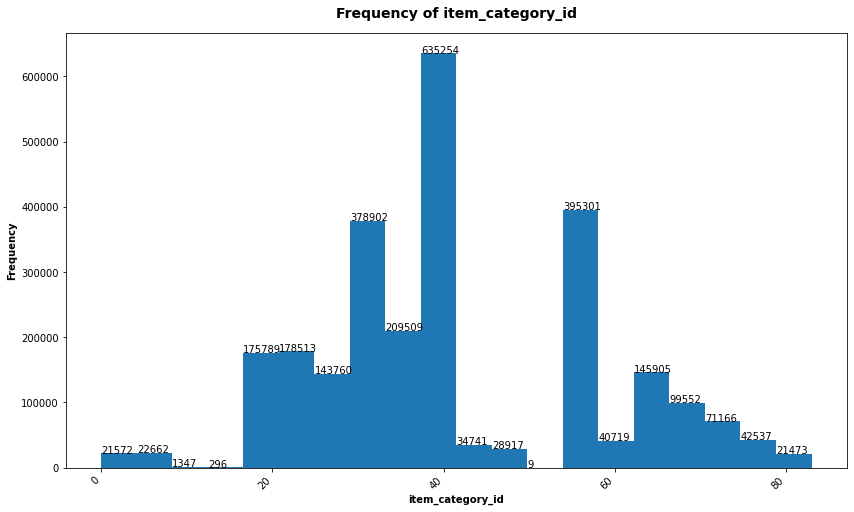

In [ ]:
column_name = 'item_category_id'
n_bin = 20
histogram(df, column_name, n_bin)

2 - For each class of price, identify the number of sales?

In [ ]:
df_1 = (df
 .groupby('item_category_id')
 .item_price_class
 .value_counts()
 .unstack()
 .fillna(0)
)

Text(0.5, 156.5, 'Item Price Class')

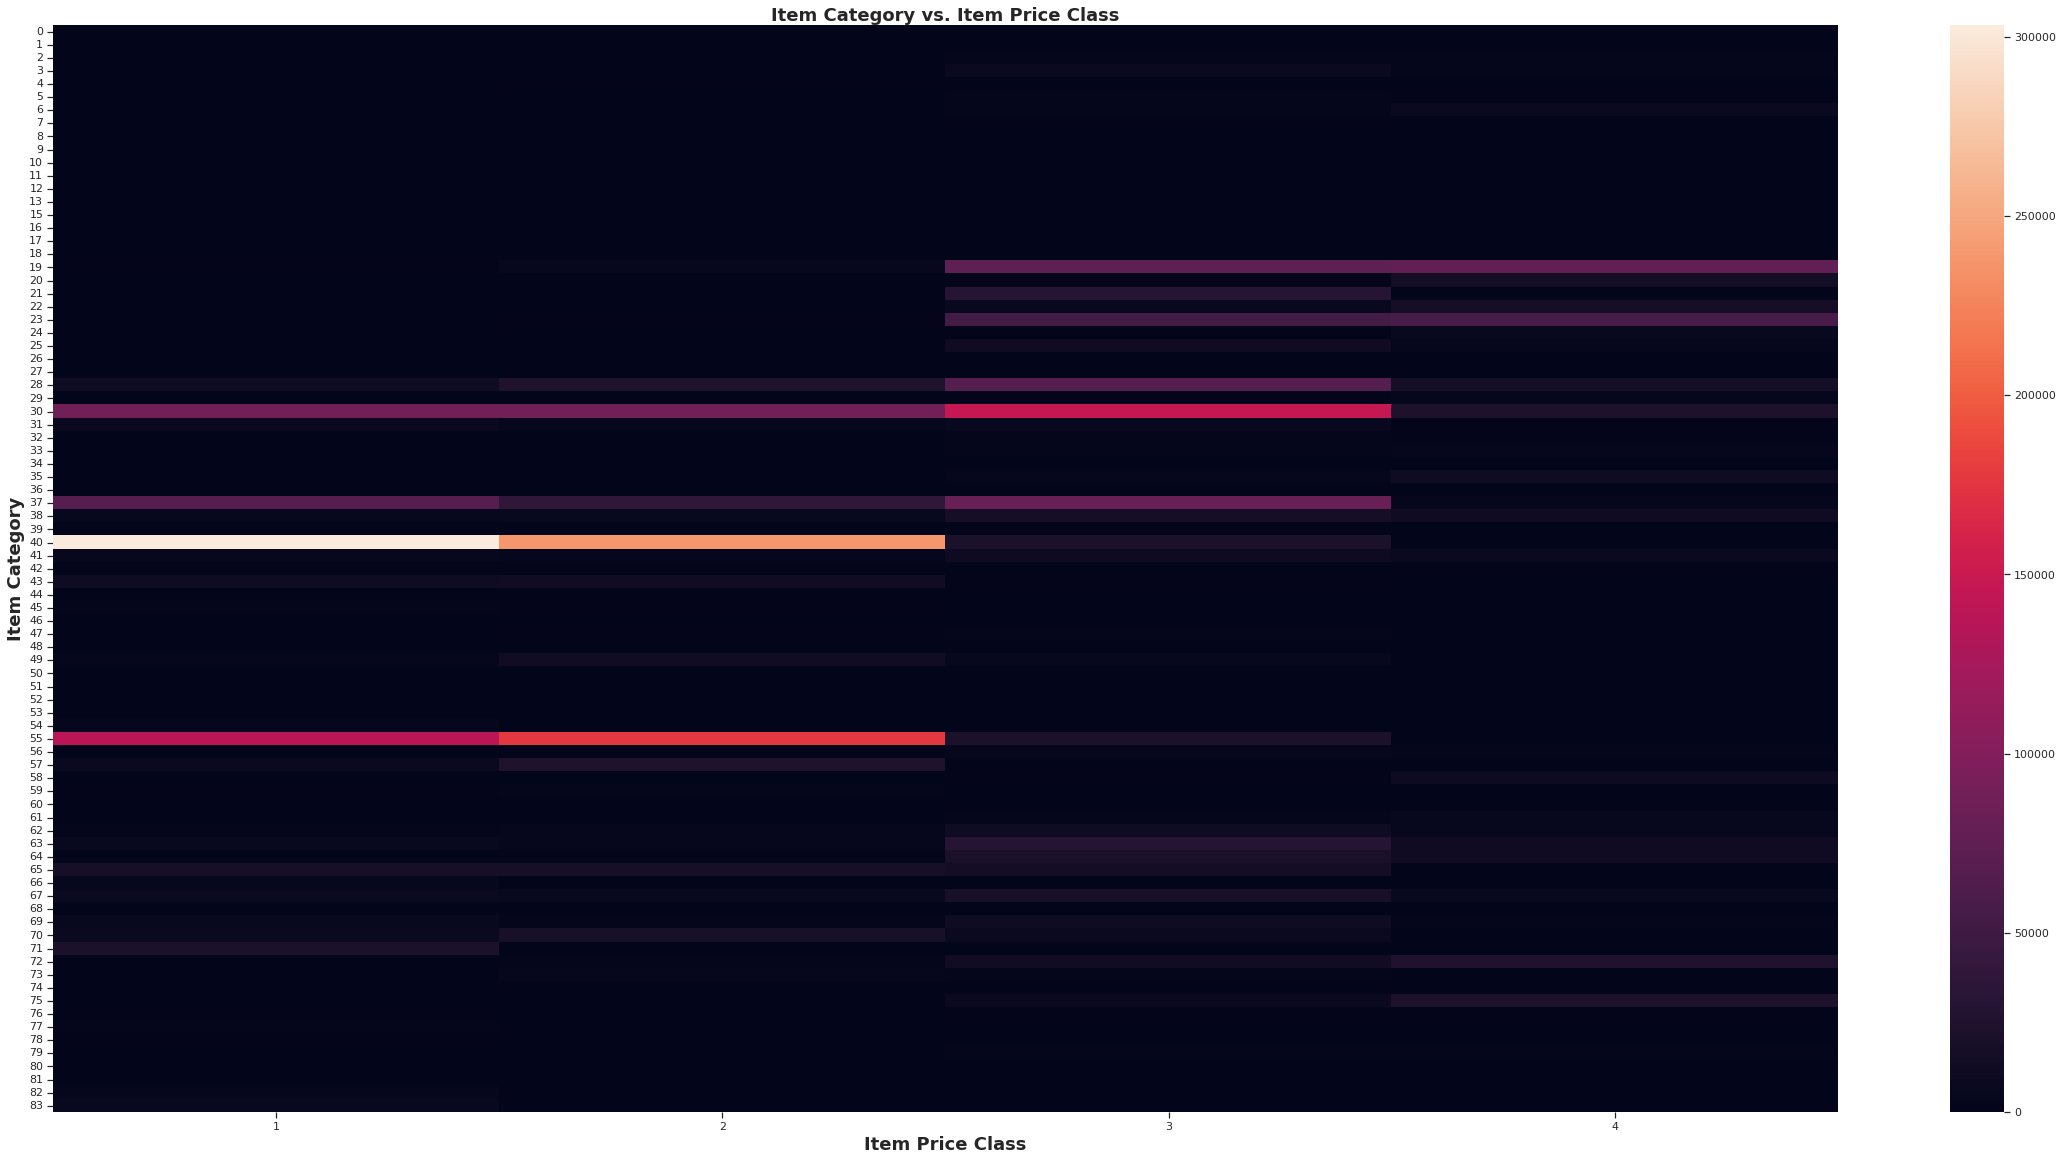

In [ ]:
# Plot Reading Scores
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,
"ytick.major.size":20})

sb.heatmap(df_1)


#plt.setp(labels, rotation='45', horizontalalignment='right')
title = "Item Category vs. Item Price Class"
ax.set_title(title, y=1.03, fontsize = 18, va = 'center', ha = 'center', weight = 'semibold')
ax.set_ylabel("Item Category", weight = 'semibold', fontsize = 18)
ax.set_xlabel(xlabel = 'Item Price Class', weight = 'semibold', fontsize = 18)


3 - Find trends in the pricing in each item category

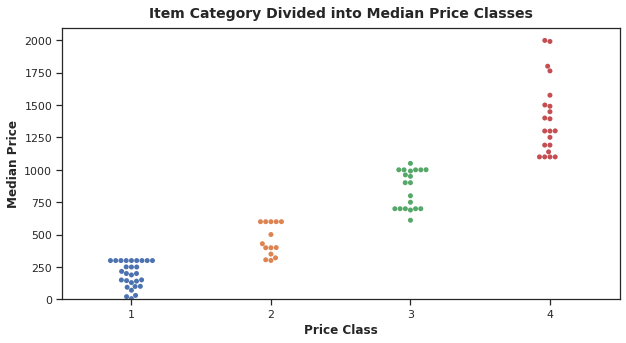

(60, 4)

In [ ]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,"ytick.major.size":20})

ax = sb.swarmplot(x="median_item_price_class", y="median_item_price", data=df_des_item_cat)

title = "Item Category Divided into Median Price Classes"
ax.set_title(title, y=1.03, fontsize = 14, va = 'center', ha = 'center', weight = 'semibold')
ax.set_ylabel("Median Price", weight = 'semibold')
ax.set_xlabel(xlabel = 'Price Class', weight = 'semibold')
ax.set_ylim(ymin=0)

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))
plt.show()
df_1.shape

In [ ]:
df_des_item_cat

,item_category_id,min_item_price,max_item_price,mean_item_price,median_item_price,total_item_price,mean_item_price_class,median_item_price_class,total_item_price_class
0,0,22.4,148.0,87.80,93.0,263.4,1,1,1
1,1,148.0,283.0,215.50,215.5,431.0,1,1,1
2,2,93.0,2116.0,1104.67,999.0,7306300.7,3,3,3
3,3,122.6,2100.0,836.28,599.0,10607388.8,3,2,3
4,4,22.0,1990.0,538.39,299.0,1221595.8,2,1,2
...,...,...,...,...,...,...,...,...,...
78,79,9.0,2122.5,961.54,900.0,7962496.8,3,3,3
79,80,900.0,1700.0,1229.71,1300.0,1436300.0,4,4,2
80,81,79.0,599.0,189.14,149.0,149798.0,1,1,2
81,82,13.0,70.0,32.63,30.0,134885.5,1,1,2


## 2 - Shops

1 - For each class of price, identify the number of sales in each shop

In [ ]:
df_1 = (df
 .groupby('shop_id')
 .item_price_class
 .value_counts()
 .unstack()
 .fillna(0)
)

2 - For each class of price, identify the number of sales in each shop?

Text(0.5, 156.5, 'Item Price Class')

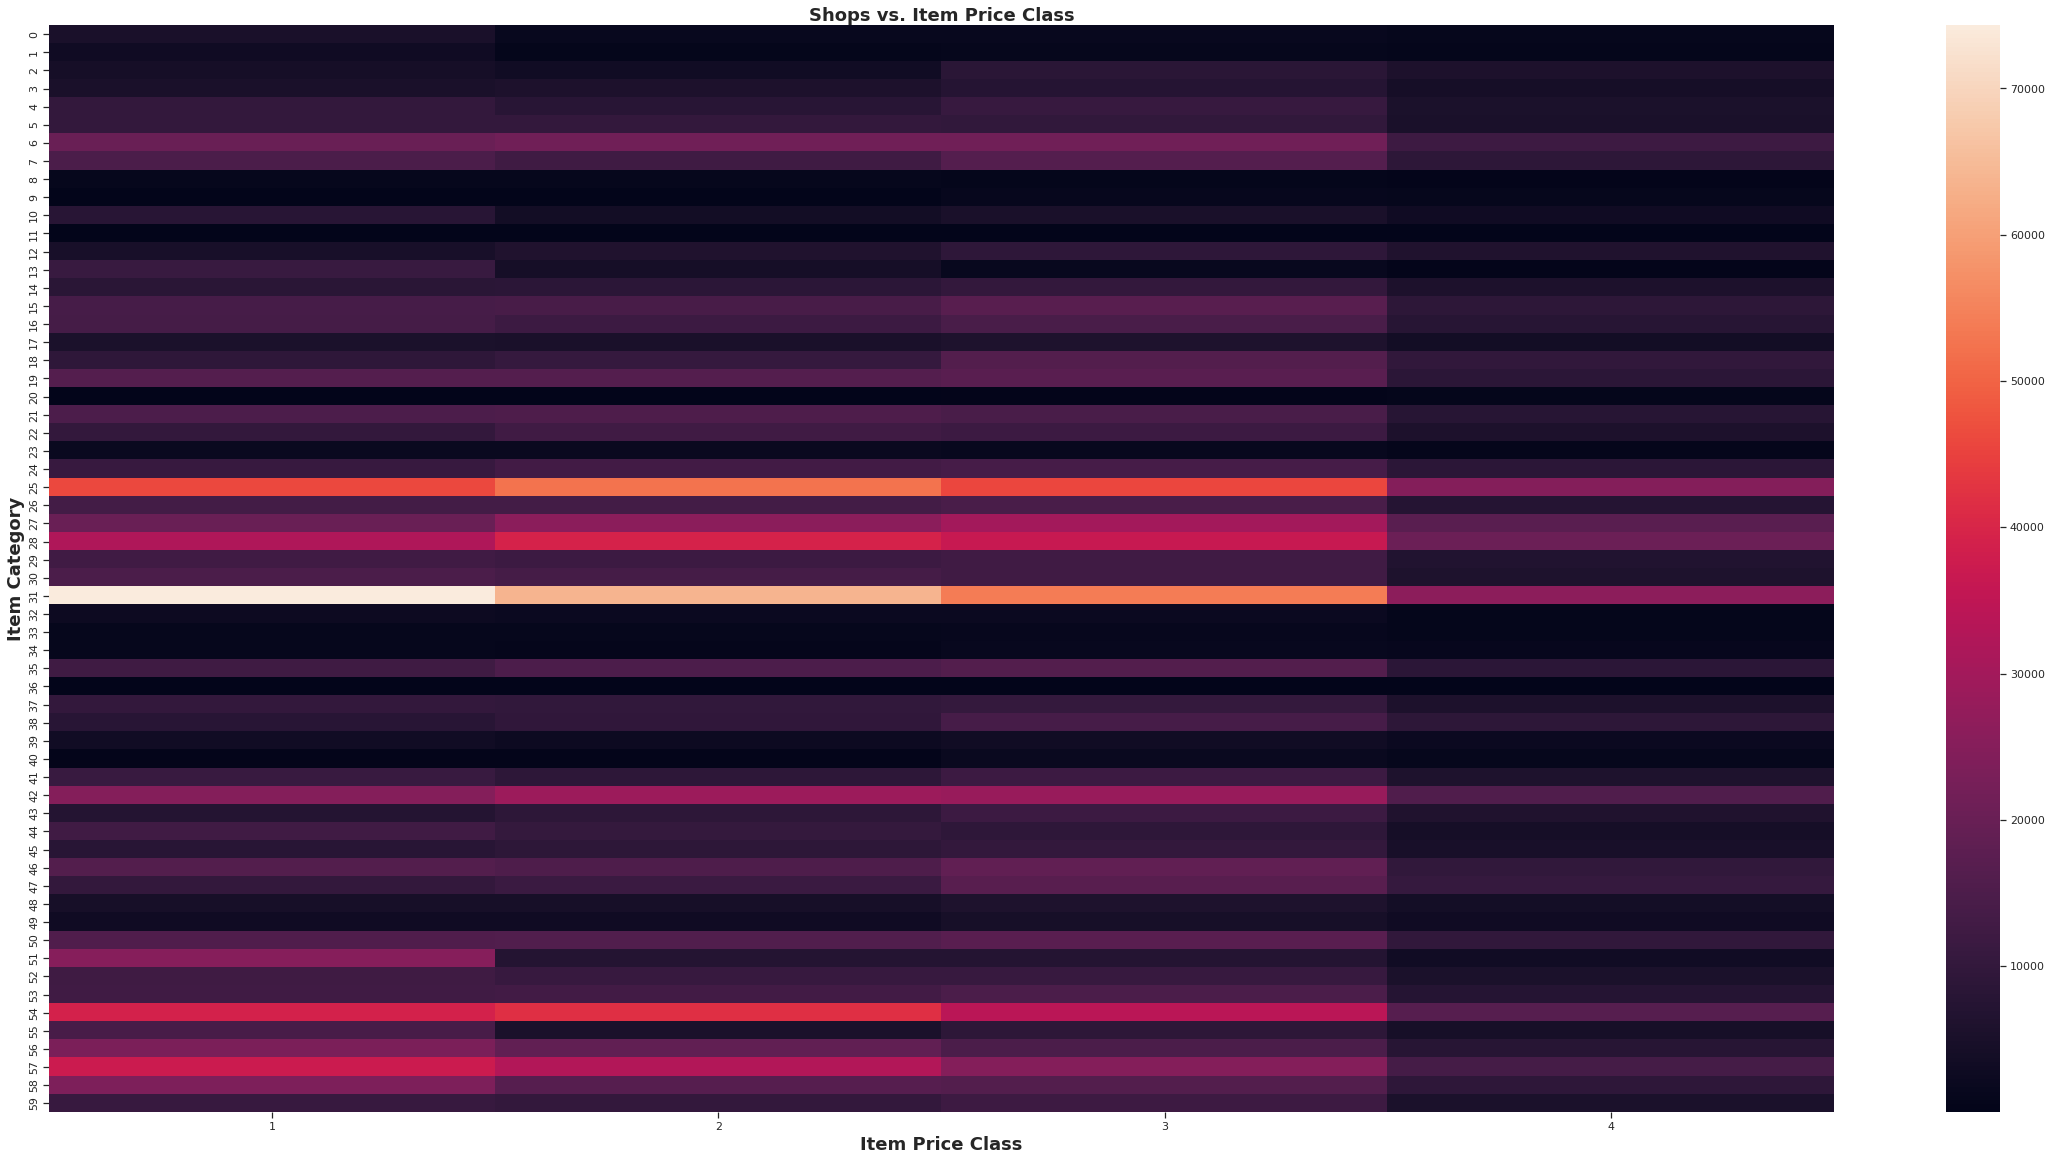

In [ ]:
# Plot Reading Scores
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,
"ytick.major.size":20})

sb.heatmap(df_1)


#plt.setp(labels, rotation='45', horizontalalignment='right')
title = "Shops vs. Item Price Class"
ax.set_title(title, y=1.03, fontsize = 18, va = 'center', ha = 'center', weight = 'semibold')
ax.set_ylabel("Item Category", weight = 'semibold', fontsize = 18)
ax.set_xlabel(xlabel = 'Item Price Class', weight = 'semibold', fontsize = 18)


3 - Find trends in the pricing in shops

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


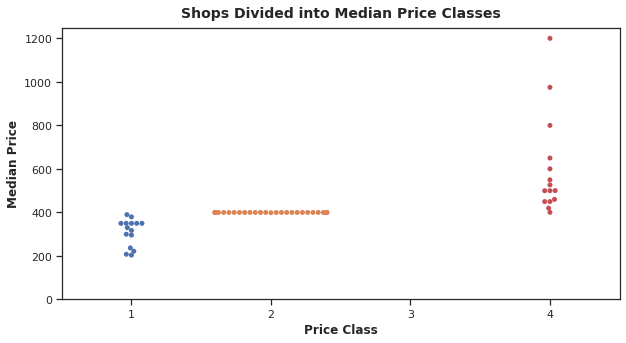

(60, 4)

In [ ]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,"ytick.major.size":20})

ax = sb.swarmplot(x="median_item_price_class", y="median_item_price", data=df_des_shops)

title = "Shops Divided into Median Price Classes"
ax.set_title(title, y=1.03, fontsize = 14, va = 'center', ha = 'center', weight = 'semibold')
ax.set_ylabel("Median Price", weight = 'semibold')
ax.set_xlabel(xlabel = 'Price Class', weight = 'semibold')
ax.set_ylim(ymin=0)

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))
plt.show()
df_1.shape

4 - Has the number of shops decreased over the date blocks?

In [ ]:
# Agggregate features
df_2 = df.groupby(['date_block_num']).agg({'shop_id':'nunique'})
# Flatten dataframe
df_2 = df_2.reset_index()

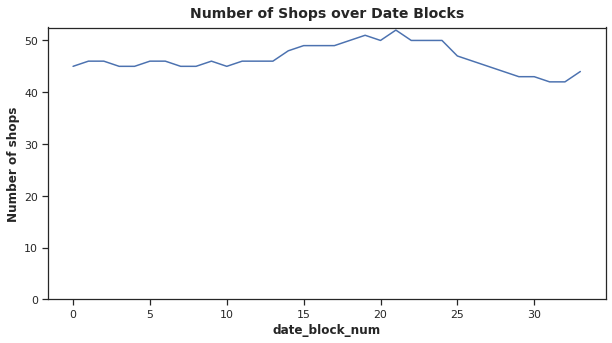

In [ ]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,"ytick.major.size":20})

ax = sb.lineplot(x="date_block_num", y="shop_id", data=df_2)

title = "Number of Shops over Date Blocks"
ax.set_title(title, y=1.03, fontsize = 14, va = 'center', ha = 'center', weight = 'semibold')
ax.set_ylabel("Number of shops", weight = 'semibold')
ax.set_xlabel(xlabel = 'date_block_num', weight = 'semibold')
ax.set_ylim(ymin=0)

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))
plt.show()

### 3. Price Class

1. How are prices distributed in the 4 price classes?


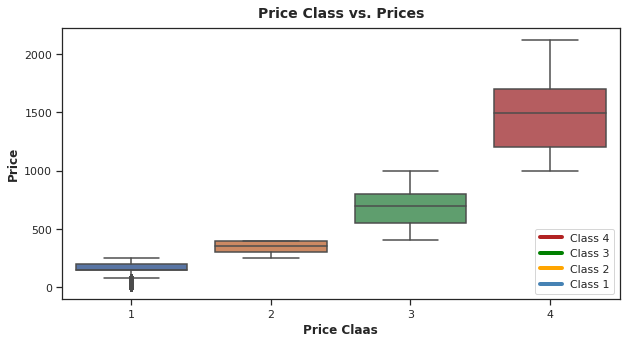

(60, 4)

In [ ]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,"ytick.major.size":20})

ax = sb.boxplot(x="item_price_class", y="item_price", data=df)

#plt.setp(labels, rotation='45', horizontalalignment='right')
title = "Price Class vs. Prices"
ax.set_title(title, y=1.03, fontsize = 14, va = 'center', ha = 'center', weight = 'semibold')
ax.set_ylabel("Price", weight = 'semibold')
ax.set_xlabel(xlabel = 'Price Claas', weight = 'semibold')

legend_elements = [Line2D([0], [0], color='firebrick', lw=4, label='Class 4'),
Line2D([0], [0], color='green', lw=4, label='Class 3'),
Line2D([0], [0], color='orange', lw=4, label='Class 2'),
Line2D([0], [0], color='steelblue', lw=4, label='Class 1')]
ax.legend(handles=legend_elements, loc='lower right');

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))
plt.show()
df_1.shape

## 4 - Date Block Num

1. What does the total sales over the years look like?

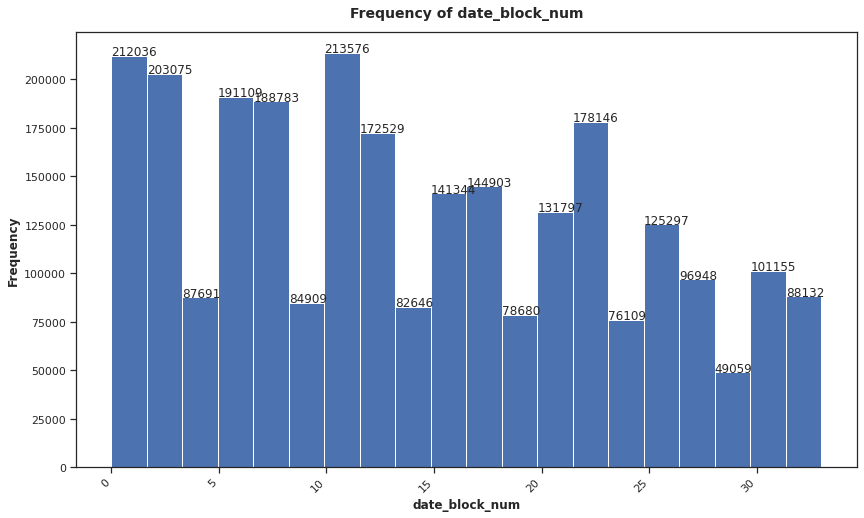

In [ ]:
column_name = 'date_block_num'
n_bin = 20
histogram(df, column_name, n_bin)

2 - What is the range of sales in different date_block_num?


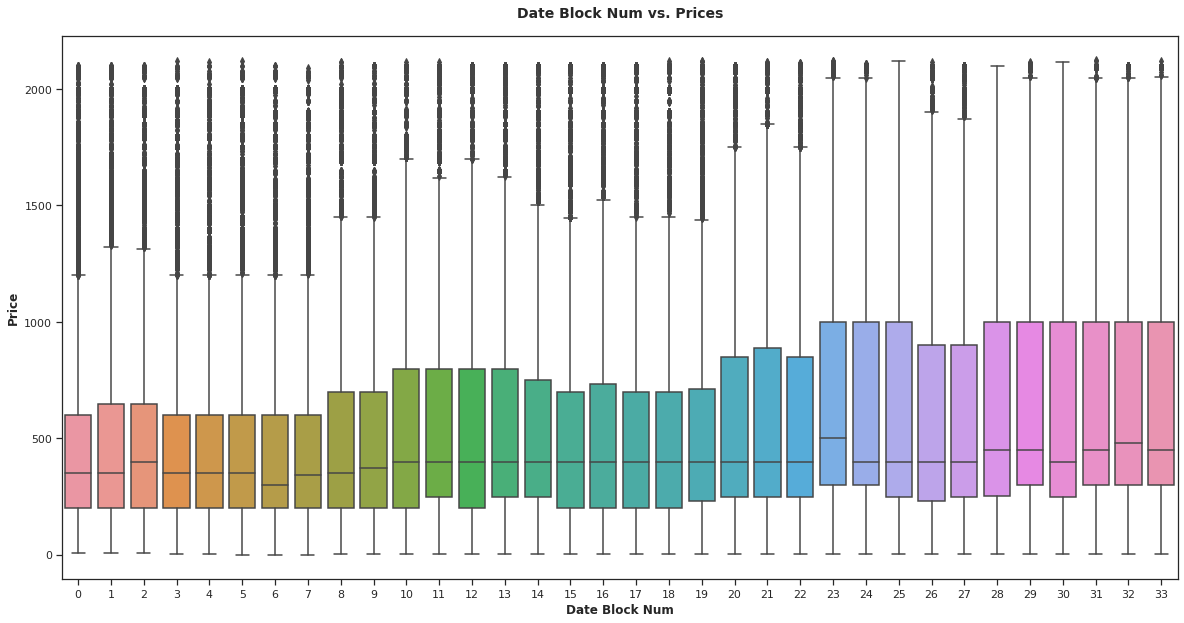

(60, 4)

In [ ]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,"ytick.major.size":20})

ax = sb.boxplot(x="date_block_num", y="item_price", data=df)

#plt.setp(labels, rotation='45', horizontalalignment='right')
title = "Date Block Num vs. Prices"
ax.set_title(title, y=1.03, fontsize = 14, va = 'center', ha = 'center', weight = 'semibold')
ax.set_ylabel("Price", weight = 'semibold')
ax.set_xlabel(xlabel = 'Date Block Num', weight = 'semibold')



for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))
plt.show()
df_1.shape

3 - For each class of price, identify the number of sales in each date block

In [ ]:
df_1 = (df
 .groupby('date_block_num')
 .item_price_class
 .value_counts()
 .unstack()
 .fillna(0)
)

Text(0.5, 156.5, 'Item Price Class')

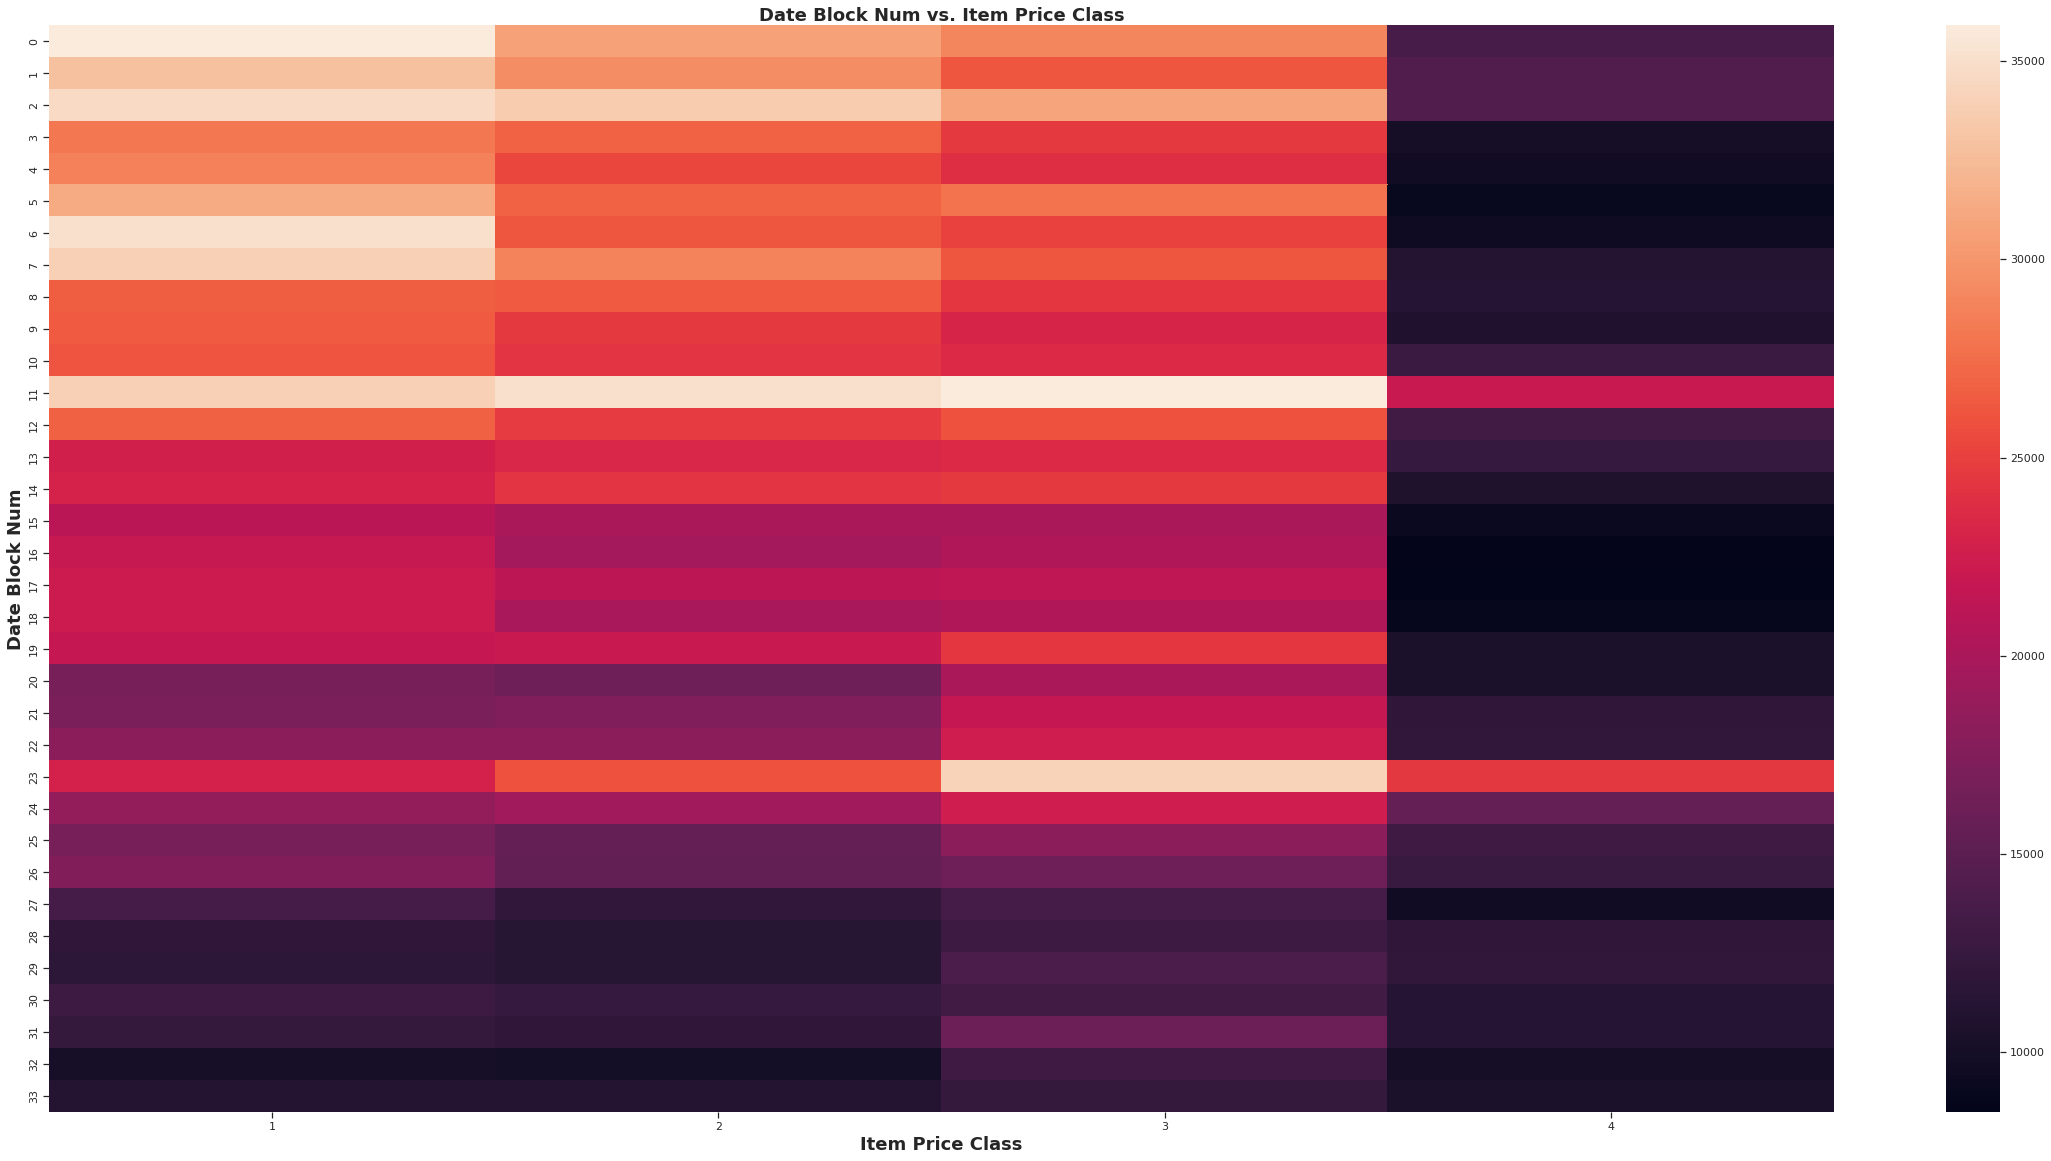

In [ ]:
# Plot Reading Scores
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,
"ytick.major.size":20})

sb.heatmap(df_1)


#plt.setp(labels, rotation='45', horizontalalignment='right')
title = "Date Block Num vs. Item Price Class"
ax.set_title(title, y=1.03, fontsize = 18, va = 'center', ha = 'center', weight = 'semibold')
ax.set_ylabel("Date Block Num", weight = 'semibold', fontsize = 18)
ax.set_xlabel(xlabel = 'Item Price Class', weight = 'semibold', fontsize = 18)


4 - Has the number of shops decreased over the date blocks?

In [ ]:
# Agggregate features
df_2 = df.groupby(['date_block_num']).agg({'item_id':'nunique'})
# Flatten dataframe
df_2 = df_2.reset_index()

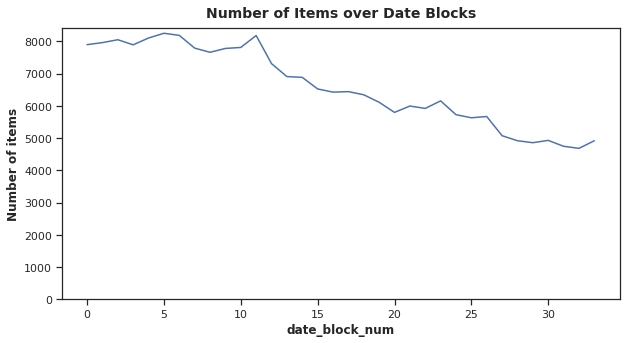

In [ ]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,"ytick.major.size":20})

ax = sb.lineplot(x="date_block_num", y="item_id", data=df_2)

title = "Number of Items over Date Blocks"
ax.set_title(title, y=1.03, fontsize = 14, va = 'center', ha = 'center', weight = 'semibold')
ax.set_ylabel("Number of items", weight = 'semibold')
ax.set_xlabel(xlabel = 'date_block_num', weight = 'semibold')
ax.set_ylim(ymin=0)

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))
plt.show()

6 - Has the prices of items decreased over the years?

In [ ]:
# Agggregate features
df_2 = df.groupby(['item_id', 'date_block_num','shop_id']).agg({'item_price':'unique'})
# Flatten dataframe
df_2 = df_2.reset_index()

In [ ]:
df_2

,item_id,date_block_num,shop_id,item_price
0,2,19,54,[58.0]
1,2,22,54,[58.0]
2,3,18,54,[100.0]
3,3,19,54,[58.0]
4,4,20,54,[58.0]
...,...,...,...,...
1499203,22168,0,12,[799.0]
1499204,22168,1,16,[799.0]
1499205,22168,1,42,[799.0]
1499206,22168,2,43,[798.5]


## 4 - Month

1. What does the total sales over the months look like?

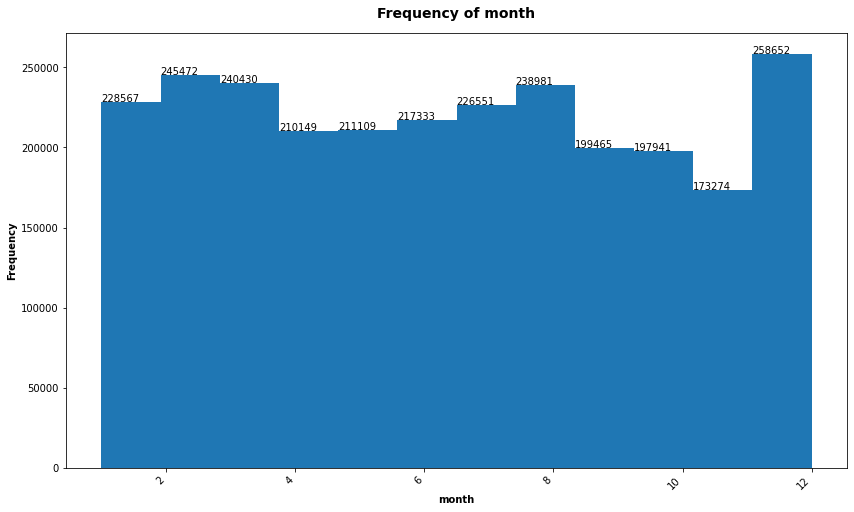

In [ ]:
column_name = 'month'
n_bin = 12
histogram(df, column_name, n_bin)

2 - What is the range of sales in different month?


In [ ]:
df_1 = (df
 .groupby('month')
 .item_price_class
 .value_counts()
 .unstack()
 .fillna(0)
)

1 - For each class of price, identify the number of sales in each month

Text(0.5, 156.5, 'Item Price Class')

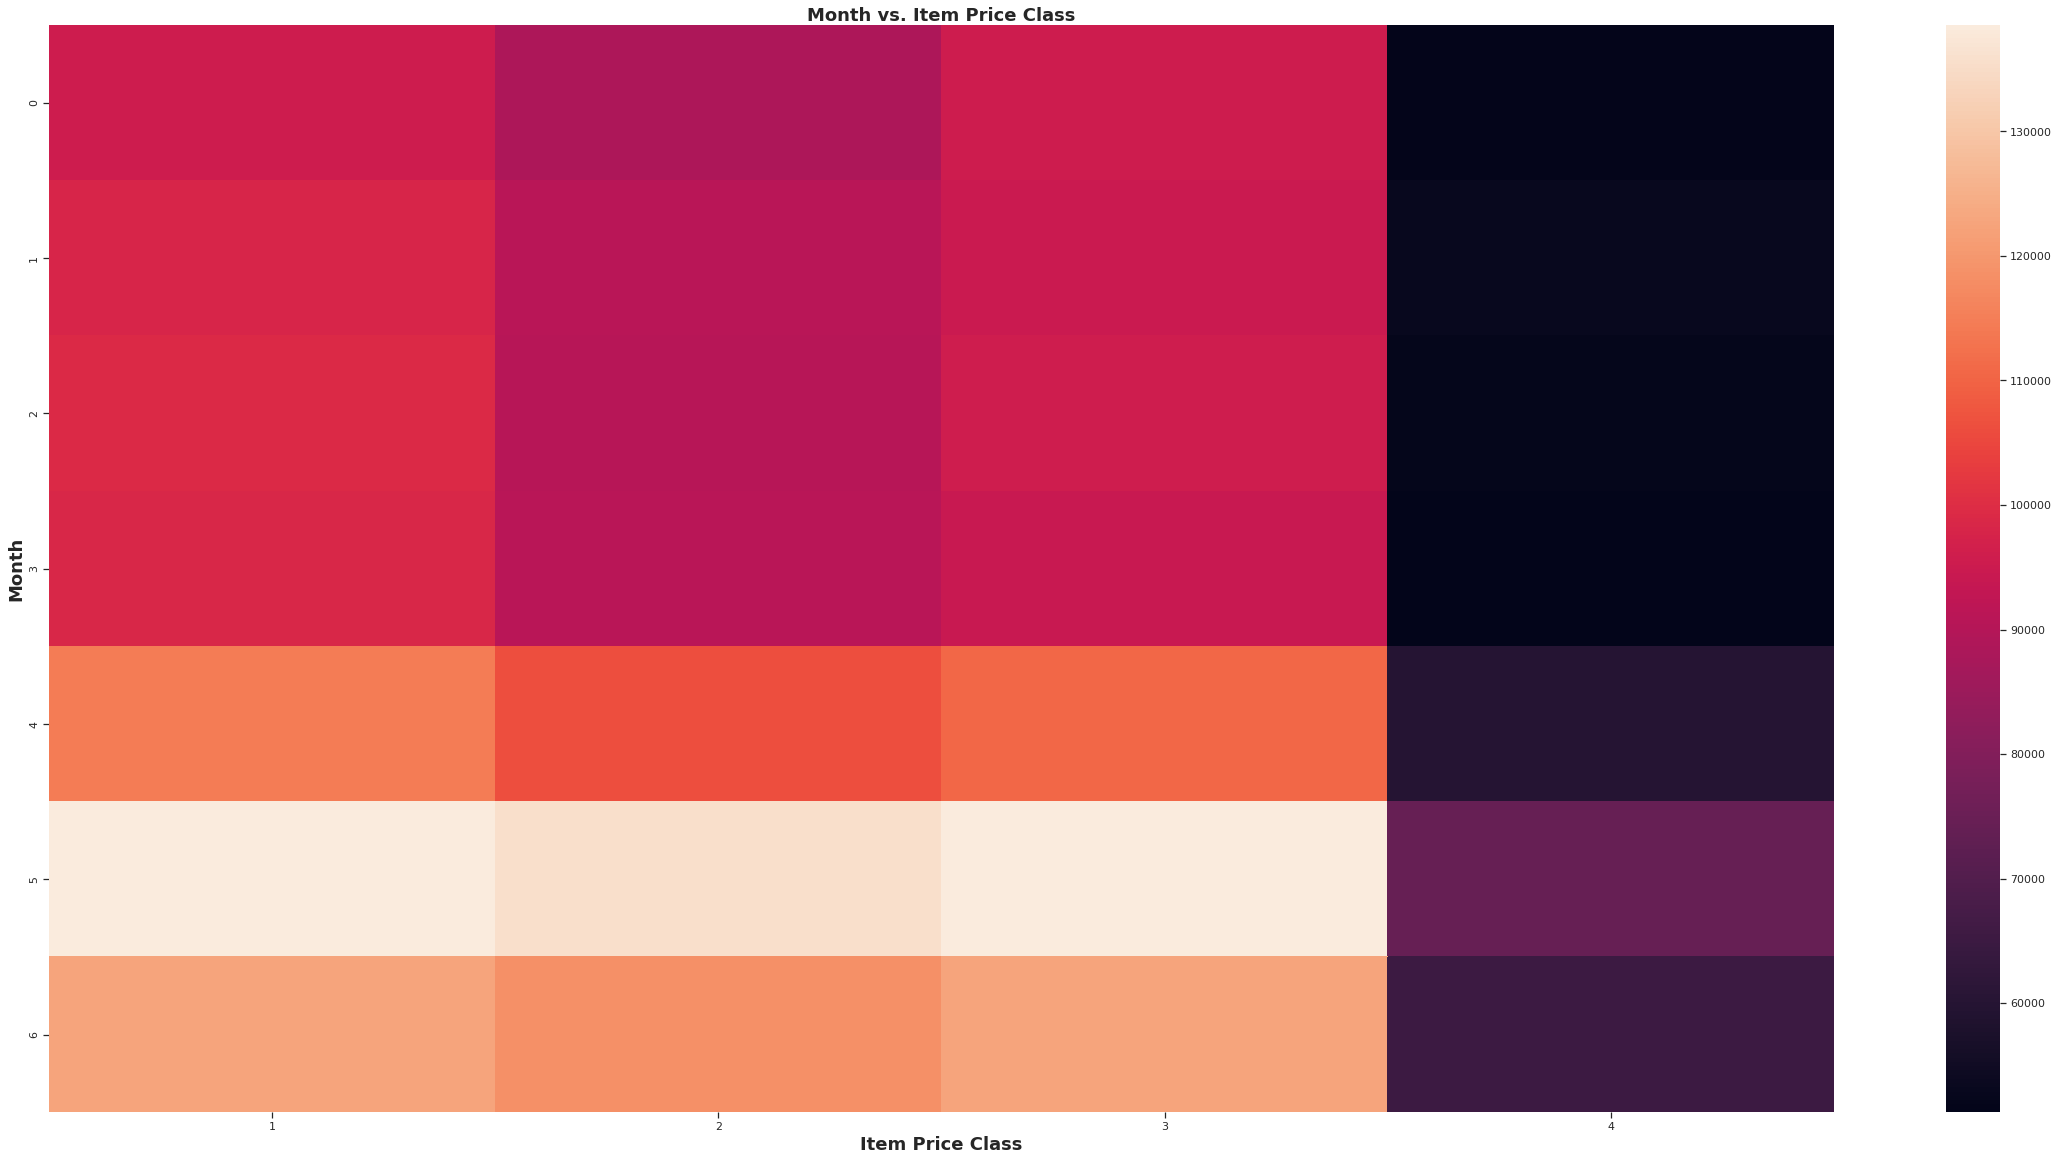

In [ ]:
# Plot Reading Scores
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,
"ytick.major.size":20})

sb.heatmap(df_1)


#plt.setp(labels, rotation='45', horizontalalignment='right')
title = "Month vs. Item Price Class"
ax.set_title(title, y=1.03, fontsize = 18, va = 'center', ha = 'center', weight = 'semibold')
ax.set_ylabel("Month", weight = 'semibold', fontsize = 18)
ax.set_xlabel(xlabel = 'Item Price Class', weight = 'semibold', fontsize = 18)


3 - What is the range of sales in different month?


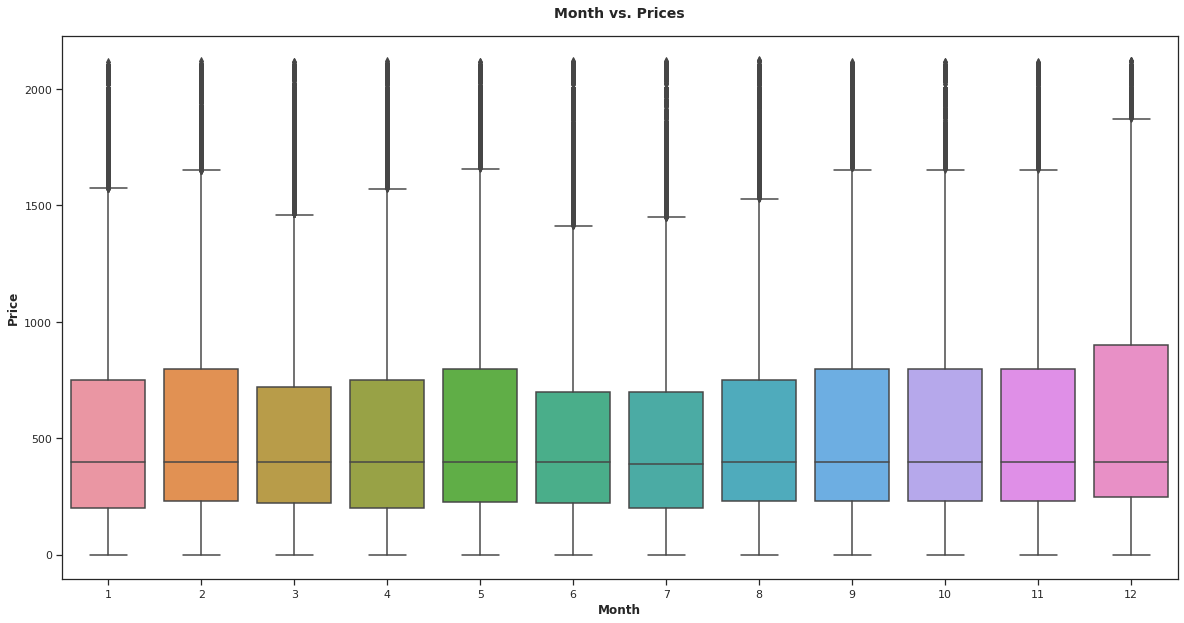

(12, 4)

In [ ]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,"ytick.major.size":20})

ax = sb.boxplot(x="month", y="item_price", data=df)

#plt.setp(labels, rotation='45', horizontalalignment='right')
title = "Month vs. Prices"
ax.set_title(title, y=1.03, fontsize = 14, va = 'center', ha = 'center', weight = 'semibold')
ax.set_ylabel("Price", weight = 'semibold')
ax.set_xlabel(xlabel = 'Month', weight = 'semibold')

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))
plt.show()
df_1.shape

## 5 - Days of the week

1. What does the total sales over the days look like?




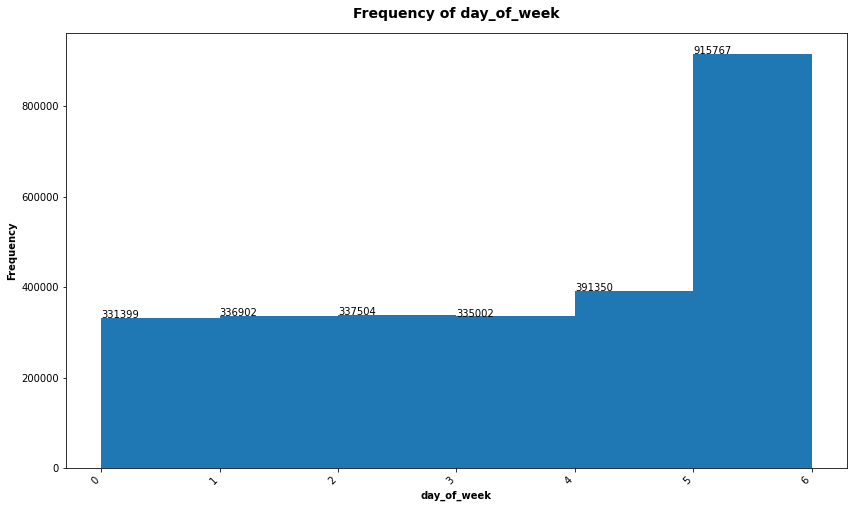

In [ ]:
column_name = 'day_of_week'
n_bin = 6
histogram(df, column_name, n_bin)

2 - For each class of price, identify the number of sales in each day

In [ ]:
df_1 = (df
 .groupby('day_of_week')
 .item_price_class
 .value_counts()
 .unstack()
 .fillna(0)
)

Text(0.5, 156.5, 'Item Price Class')

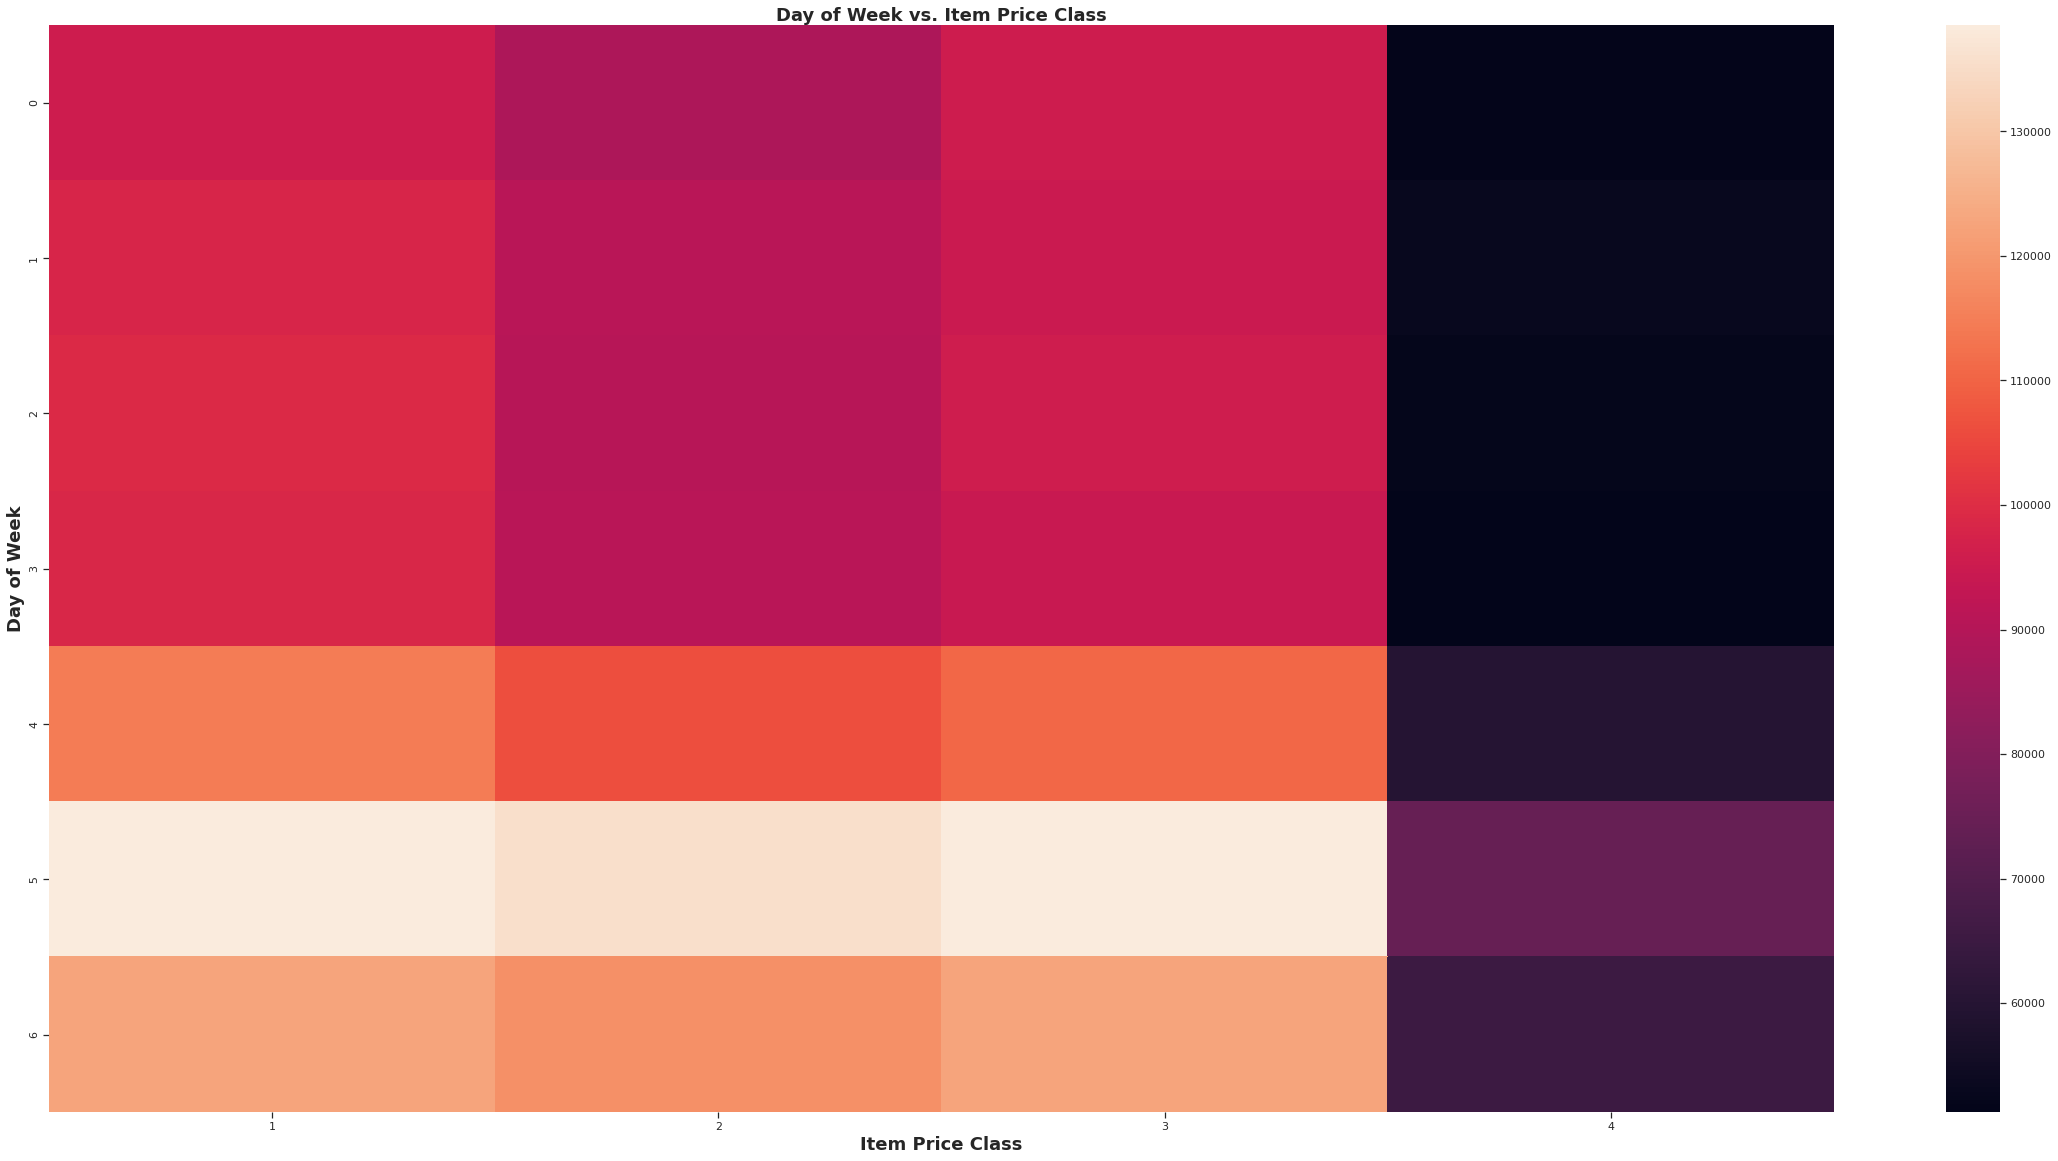

In [ ]:
# Plot Reading Scores
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,
"ytick.major.size":20})

sb.heatmap(df_1)


#plt.setp(labels, rotation='45', horizontalalignment='right')
title = "Day of Week vs. Item Price Class"
ax.set_title(title, y=1.03, fontsize = 18, va = 'center', ha = 'center', weight = 'semibold')
ax.set_ylabel("Day of Week", weight = 'semibold', fontsize = 18)
ax.set_xlabel(xlabel = 'Item Price Class', weight = 'semibold', fontsize = 18)


3 - What is the range of sales in different day?


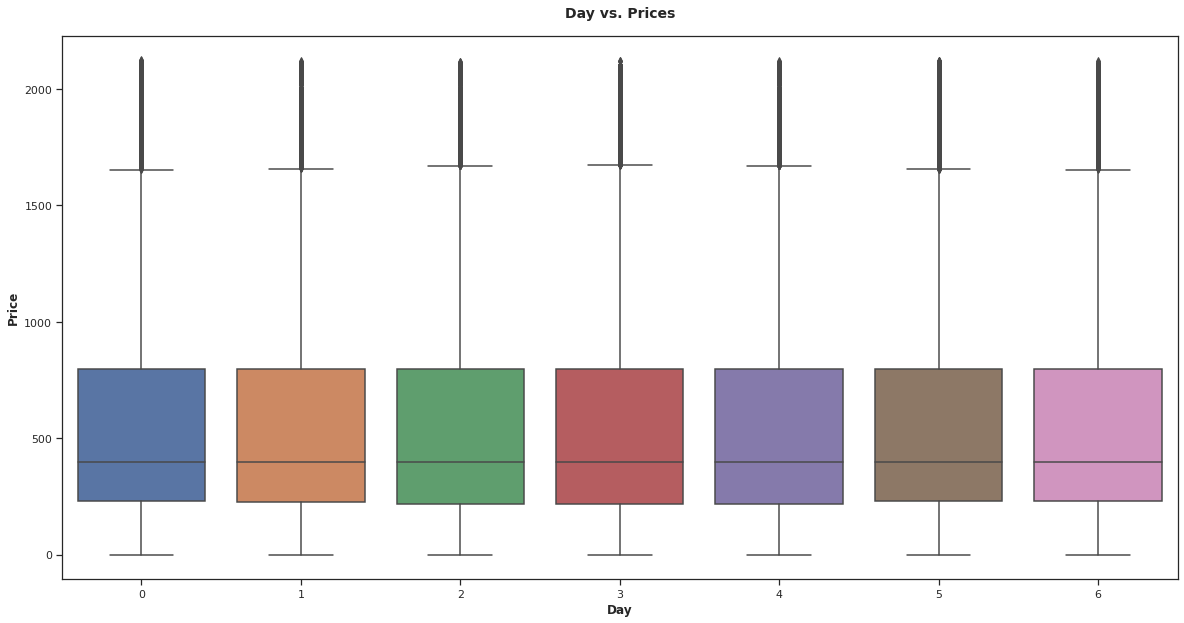

In [ ]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
sb.set_style("ticks",{"xtick.major.size":20,"ytick.major.size":20})

ax = sb.boxplot(x="day_of_week", y="item_price", data=df)

#plt.setp(labels, rotation='45', horizontalalignment='right')
title = "Day vs. Prices"
ax.set_title(title, y=1.03, fontsize = 14, va = 'center', ha = 'center', weight = 'semibold')
ax.set_ylabel("Price", weight = 'semibold')
ax.set_xlabel(xlabel = 'Day', weight = 'semibold')

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))
plt.show()

### 6 - Year

1. What does the total sales over the year look like?




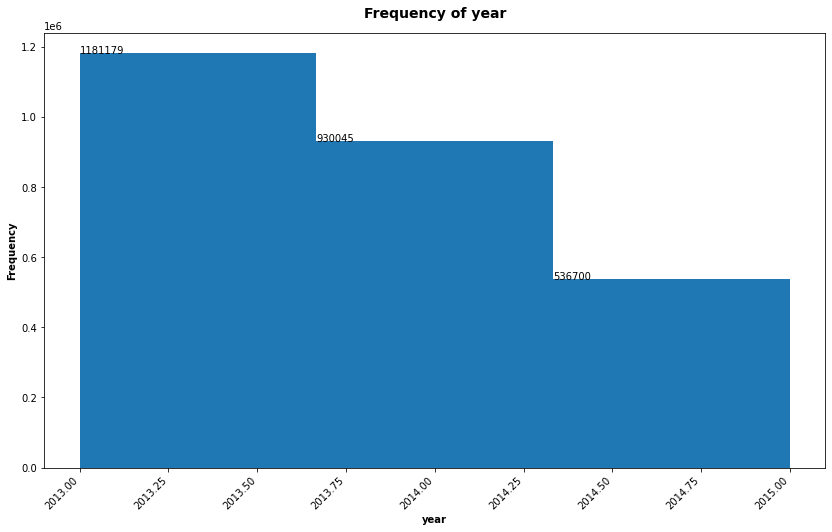

In [ ]:
column_name = 'year'
n_bin = 3
histogram(df, column_name, n_bin)

## 7 - Correlation

1 - Correlation Heat Map

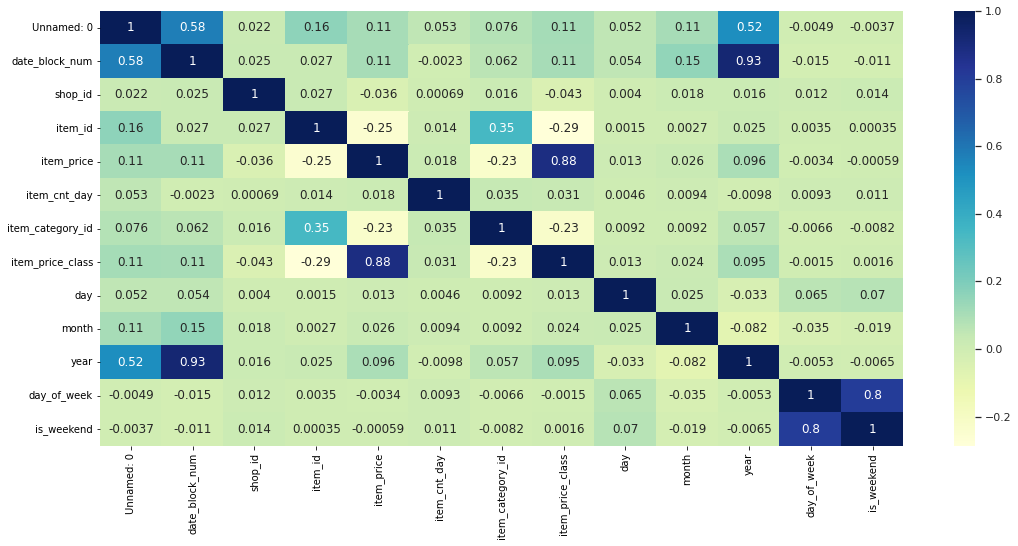

In [ ]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)


2. For each item, find the average price, its average sales per day and check if these are correlated

In [15]:
df.columns

Index(['Unnamed: 0', 'date', 'date_block_num', 'shop_id', 'item_id',
       'item_price', 'item_cnt_day', 'item_category_id', 'item_price_class',
       'day', 'month', 'year', 'day_of_week', 'is_weekend'],
      dtype='object')

In [22]:
# Find averqage price of each item

df_1 = df.groupby(['item_id']).agg({'item_price':'mean'})
# Flatten dataframe
df_1 = df_1.reset_index()
df_1 = df_1.round(2)  


In [26]:
# Find averqage item count of each item per day

df_2 = df.groupby(['date','item_id']).agg({'item_cnt_day':'sum'})
# Flatten dataframe
df_2 = df_2.reset_index()
df_2 = df_2.round(2)  


In [28]:
# Find averqage item count of each item on the whole

df_3 = df_2.groupby(['item_id']).agg({'item_cnt_day':'mean'})
# Flatten dataframe
df_3 = df_3.reset_index()
df_3 = df_3.round(2)  


In [31]:
# Join two dataframes
df_4 = pd.merge(df_1, df_3, on='item_id')

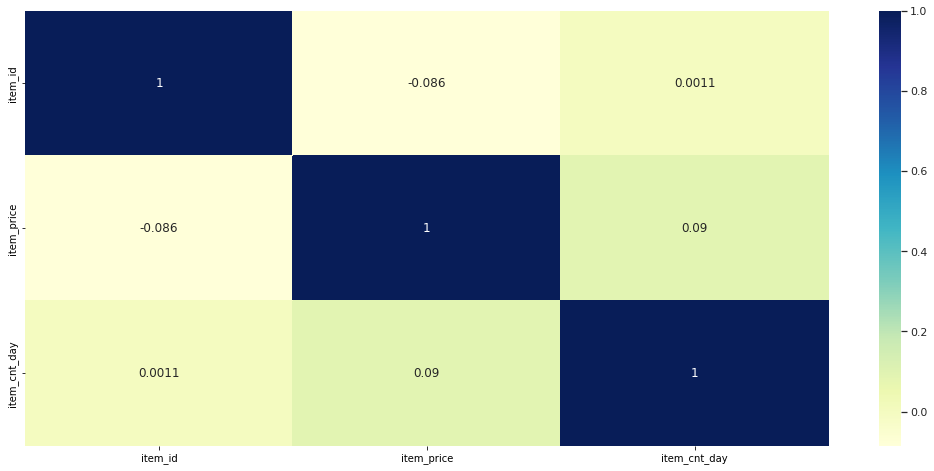

In [33]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sb.set_theme(style="whitegrid")
dataplot = sb.heatmap(df_4.corr(), cmap="YlGnBu", annot=True)
